# Model results for simulated and natural populations

Plots model results for all populations by timepoint including those shown in Figures 2, 3, 5, and 6 and Supplemental Figures S3, S6, and S8.

Generates tables of model results for all populations including those in Tables 1 and 2 and Supplemental Table S3.

Plots cross-validation approaches shown in Supplemental Figures S1 and S5.

In [ ]:
# Define inputs.
errors_file = "../results/distance_model_errors.tsv"
coefficients_file = "../results/distance_model_coefficients.tsv"

# Define outputs.
table_for_simulated_model_selection = "../manuscript/tables/simulated_model_selection.tex"
figure_for_simulated_model_controls = "../manuscript/figures/unadjusted-model-accuracy-and-coefficients-for-simulated-populations-controls.pdf"
figure_for_simulated_individual_models = "../manuscript/figures/unadjusted-model-accuracy-and-coefficients-for-simulated-populations.pdf"
figure_for_simulated_composite_models = "../manuscript/figures/unadjusted-composite-model-accuracy-and-coefficients-for-simulated-populations.pdf"

table_for_natural_model_selection = "../manuscript/tables/natural_model_selection.tex"
table_for_natural_model_complete_selection = "../manuscript/tables/complete_natural_model_selection.tex"
figure_for_natural_epitope_vs_oracle_models = "../manuscript/figures/unadjusted-composite-model-accuracy-and-coefficients-for-natural-populations-epitope-vs-oracle.pdf"
figure_for_natural_individual_models = "../manuscript/figures/unadjusted-model-accuracy-and-coefficients-for-natural-populations.pdf"
figure_for_natural_composite_models = "../manuscript/figures/best-composite-unadjusted-model-accuracy-and-coefficients-for-natural-populations.pdf"

figure_for_natural_updated_models = "../manuscript/figures/models-natural-populations-composite-with-updated-coefficients-across-test-data.pdf"

figure_for_simulated_cross_validation = "../manuscript/figures/cross-validation-for-simulated-populations.pdf"
figure_for_natural_cross_validation = "../manuscript/figures/cross-validation-for-natural-populations.pdf"


## Import and define functions
[back to top](#Summarize-models)

In [1]:
import matplotlib as mpl
from matplotlib.collections import LineCollection
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import seaborn as sns

%matplotlib inline

In [2]:
register_matplotlib_converters()

In [3]:
sns.set_style("white")
plt.style.use("huddlej")

In [4]:
# Display figures at a reasonable default size.
mpl.rcParams['figure.figsize'] = (6, 4)

# Disable top and right spines.
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
    
# Display and save figures at higher resolution for presentations and manuscripts.
mpl.rcParams['savefig.dpi'] = 200
mpl.rcParams['figure.dpi'] = 200

# Display text at sizes large enough for presentations and manuscripts.
mpl.rcParams['font.weight'] = "normal"
mpl.rcParams['axes.labelweight'] = "normal"
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

mpl.rc('text', usetex=False)

In [5]:
panel_labels_dict = {
    "weight": "bold",
    "size": 14
}

In [6]:
colors = ['#d73027','#fc8d59','#fee090','#e0f3f8','#91bfdb','#4575b4']

In [7]:
colors.reverse()

In [8]:
colors

['#4575b4', '#91bfdb', '#e0f3f8', '#fee090', '#fc8d59', '#d73027']

In [9]:
ncols = 2
color_by_predictor = {
    'naive': '#000000',
    'offspring': '#000000',
    'normalized_fitness': '#000000',
    'fitness': '#000000',
    'ep': '#4575b4',
    'ep_wolf': '#4575b4',
    'ep_star': '#4575b4',
    'ep_x': '#4575b4',
    'ep_x_koel': '#4575b4',
    'ep_x_wolf': '#4575b4',
    'oracle_x': '#4575b4',
    'rb': '#4575b4',
    'cTiter': '#91bfdb',
    'cTiter_x': '#91bfdb',
    'cTiterSub': '#91bfdb',
    'cTiterSub_star': '#91bfdb',
    'cTiterSub_x': '#91bfdb',
    'fra_cTiter_x': '#91bfdb',
    'ne_star': '#2ca25f',
    'dms_star': '#99d8c9',
    "dms_nonepitope": "#99d8c9",
    "dms_entropy": "#99d8c9",
    'unnormalized_lbi': '#fc8d59',
    'lbi': '#fc8d59',
    'delta_frequency': '#d73027'
}

name_by_predictor = {
    "naive": "naive",
    "offspring": "observed fitness",
    "normalized_fitness": "true fitness",
    "fitness": "estimated fitness",
    "ep": "epitope mutations",
    "ep_wolf": "Wolf epitope mutations",
    "ep_star": "epitope ancestor",
    "ep_x": "epitope antigenic novelty",
    "ep_x_koel": "Koel epitope antigenic novelty",
    "ep_x_wolf": "Wolf epitope antigenic novelty",
    "oracle_x": "oracle antigenic novelty",
    "rb": "Koel epitope mutations",
    "cTiter": "antigenic advance",
    "cTiter_x": "HI antigenic novelty",
    "cTiterSub": "linear HI mut phenotypes",
    "cTiterSub_star": "ancestral HI mut phenotypes",
    "cTiterSub_x": "HI sub cross-immunity",
    "fra_cTiter_x": "FRA antigenic novelty",
    "ne_star": "mutational load",
    "dms_star": "DMS mutational effects",
    "dms_nonepitope": "DMS mutational load",
    "dms_entropy": "DMS entropy",
    "unnormalized_lbi": "unnormalized LBI",
    "lbi": "LBI",
    "delta_frequency": "delta frequency"
}

predictors_to_drop = [
    "ep",
    "cTiter",
    "cTiterSub",
    "cTiterSub_star",
    "cTiterSub_x"
    #"delta_frequency-ne_star",
    #"lbi-ep_x-ne_star"
]

In [10]:
def get_individual_predictors_for_data_frame(df):
    return [
        predictor
        for predictor in df["predictors"].unique()
        if "-" not in predictor and predictor != "naive"
    ]

def get_composite_predictors_for_data_frame(df):
    return [
        predictor
        for predictor in df["predictors"].unique()
        if "-" in predictor
    ]

In [12]:
def plot_model_accuracy_and_coefficients_for_build(errors_by_time_df, coefficients_by_time_df, predictors, rotation=30,
                                             years_fmt_string="%Y", date_fmt_string="%Y-%m-%d", height=12, width=12,
                                             text_vertical_padding=0.12, hspace=0.1, wspace=0.2, max_predictor_name_length=55,
                                             share_y=True, max_coefficient=None, min_normal_error=None, max_normal_error=None,
                                             error_attribute="validation_error", distance_axis_label="Distance to\nfuture (AAs)",
                                             coefficient_axis_label="Coefficient"):
    # Determine bounds for given data to set axes domains and ranges.
    std_normal_error = errors_by_time_df[error_attribute].std()
    
    if max_normal_error is None:
        max_normal_error = errors_by_time_df[error_attribute].max()
        max_normal_error += 2.0 * std_normal_error

    if min_normal_error is None:
        #min_normal_error = errors_by_time_df[error_attribute].min()
        #min_normal_error -= 0.5 * std_normal_error
        min_normal_error = 0.0
        
    min_coefficient = coefficients_by_time_df["coefficient"].min()
    
    if max_coefficient is None:
        max_coefficient = coefficients_by_time_df["coefficient"].max() + 2

    min_date = errors_by_time_df["validation_timepoint"].min() - pd.DateOffset(months=6)
    max_date = errors_by_time_df["validation_timepoint"].max() + pd.DateOffset(months=6)
    
    nrows = len(predictors)
    
    naive_error_df = errors_by_time_df[errors_by_time_df["predictors"] == "naive"].copy()
    naive_validation_error_df = naive_error_df[naive_error_df["error_type"] == "validation"].copy()
    naive_test_error_df = naive_error_df[naive_error_df["error_type"] == "test"].copy()
    total_validation_timepoints = naive_validation_error_df.shape[0]
    total_timepoints = naive_error_df.shape[0]
    
    fig, axes = plt.subplots(figsize=(width, height), facecolor='w')
    gs = gridspec.GridSpec(
        nrows=nrows,
        ncols=ncols,
        hspace=hspace,
        wspace=wspace
        #width_ratios=[(total_validation_timepoints + 2) / float(total_timepoints), 1.0]
    )

    years = mdates.YearLocator(3)
    years_fmt = mdates.DateFormatter(years_fmt_string)
    months = mdates.MonthLocator()
    
    # Get the start and end date for test data to enable visual delineation of these later data.
    test_start_date, test_end_date = naive_test_error_df["validation_timepoint"].aggregate(["min", "max"]).values

    for i, predictor in enumerate(predictors):
        error_df = errors_by_time_df[errors_by_time_df["predictors"] == predictor].copy()
        validation_error_df = error_df[error_df["error_type"] == "validation"].copy()
        test_error_df = error_df[error_df["error_type"] == "test"].copy()
        
        coefficient_df = coefficients_by_time_df[coefficients_by_time_df["predictors"] == predictor].copy()
        validation_coefficient_df = coefficient_df[coefficient_df["error_type"] == "validation"].copy()
        test_coefficient_df = coefficient_df[coefficient_df["error_type"] == "test"].copy()
        
        composite_predictors = predictor.split("-")
        composite_predictors_name = " + ".join([name_by_predictor[predictor_name] for predictor_name in composite_predictors])
        if len(composite_predictors_name) > max_predictor_name_length:
            predictor_name_spacing = "\n"
        else:
            predictor_name_spacing = " "

        distance_ax = plt.subplot(gs[i, 1])    
        distance_ax.set_xlabel("Date")
        distance_ax.set_ylabel(distance_axis_label)

        distance_ax.axhline(
            y=0.0,
            color="#cccccc"
        )

        # Plot validation data.        
        distance_ax.plot(
            pd.to_datetime(validation_error_df["validation_timepoint"]).astype(np.datetime64),
            validation_error_df[error_attribute],
            "o-",
            color="#000000",
            label="validation: %.2f +/- %.2f" % (validation_error_df[error_attribute].mean(), validation_error_df[error_attribute].std())
        )
        
        # Plot distance from current timepoint to future.
        distance_ax.plot(
            pd.to_datetime(naive_validation_error_df["validation_timepoint"]).astype(np.datetime64),
            naive_validation_error_df[error_attribute],
            "o-",
            color="#cccccc",
            label="",
            zorder=-10
        )
        
        # Plot test data.
        if test_error_df.shape[0] > 0:
            model_test_distance_handle_output = distance_ax.plot(
                pd.to_datetime(test_error_df["validation_timepoint"]).astype(np.datetime64),
                test_error_df[error_attribute],
                "o-",
                fillstyle="none",
                color="#000000",
                label="test: %.2f +/- %.2f" % (test_error_df[error_attribute].mean(), test_error_df[error_attribute].std())
            )
            
            # Plot future distance to itself for this timepoint (the optimal).
            distance_ax.plot(
                pd.to_datetime(naive_test_error_df["validation_timepoint"]).astype(np.datetime64),
                naive_test_error_df[error_attribute],
                "o-",
                fillstyle="none",
                color="#cccccc",
                label="",
                zorder=-10
            )
        
        distance_ax.legend(
            loc="upper left",
            frameon=False,
            fontsize=12,
            ncol=2
        )
        
        """# Highlight validation window.
        rectangle = plt.Rectangle(
            (test_start_date, min_normal_error),
            test_end_date - test_start_date,
            max_normal_error - min_normal_error,
            fc='#cccccc',
            alpha=0.5,
            zorder=-10
        )
        distance_ax.add_patch(rectangle)"""

        distance_ax.set_xlim(min_date, max_date)
        
        distance_ax.set_ylim(min_normal_error, max_normal_error)
        #distance_ax.set_ylim(0, max_normal_error + std_normal_error / 2)
        distance_ax.xaxis.set_major_locator(years)
        distance_ax.xaxis.set_major_formatter(years_fmt)
        distance_ax.xaxis.set_minor_locator(months)
        distance_ax.format_xdata = mdates.DateFormatter(date_fmt_string)

        coefficient_ax = plt.subplot(gs[i, 0])
        coefficient_ax.set_xlabel("Date")
        coefficient_ax.set_ylabel(coefficient_axis_label)
        
        if share_y:
            coefficient_ax.set_ylim(min_coefficient - 1, max_coefficient)

        coefficient_ax.axhline(
            y=0.0,
            color="#cccccc"
        )

        # Plot validation coefficients
        for predictor, predictor_coefficient_df in validation_coefficient_df.groupby("predictor"):
            coefficient_ax.plot(
                predictor_coefficient_df["validation_timepoint"],
                predictor_coefficient_df["coefficient"],
                "o-",
                color=color_by_predictor[predictor],
                label="%s: %.2f +/- %.2f" % (
                    name_by_predictor[predictor],
                    predictor_coefficient_df["coefficient"].mean(),
                    predictor_coefficient_df["coefficient"].std()
                )
            )
            
        coefficient_ax.legend(
            loc="upper left",
            frameon=False,
            fontsize=12
        )

        # Plot fixed coefficients for testing
        for predictor, predictor_coefficient_df in test_coefficient_df.groupby("predictor"):
            coefficient_ax.plot(
                predictor_coefficient_df["validation_timepoint"],
                predictor_coefficient_df["coefficient"],
                "o-",
                fillstyle="none",
                color=color_by_predictor[predictor],
                label="%s: %.2f +/- %.2f" % (
                    name_by_predictor[predictor],
                    predictor_coefficient_df["coefficient"].mean(),
                    predictor_coefficient_df["coefficient"].std()
                )
            )

        coefficient_ax.set_xlim(min_date, max_date)
        coefficient_ax.xaxis.set_major_locator(years)
        coefficient_ax.xaxis.set_major_formatter(years_fmt)
        coefficient_ax.xaxis.set_minor_locator(months)
        coefficient_ax.format_xdata = mdates.DateFormatter(date_fmt_string)

    fig.autofmt_xdate(rotation=rotation, ha="center")
    gs.tight_layout(fig, h_pad=hspace)
    # show x-axis tick lines
    
    return (fig, axes, gs)

In [13]:
def prepare_table(errors_df, coefficients_df, text_width=1.0, include_coefficients=True):
    error_metric = "validation_error"
    
    coefficient_columns = ["model", "predictor", "coefficient_mean", "coefficient_std"]
    model_selection_coefficients = coefficients_df.groupby(["model", "predictor"], sort=False).aggregate({
        "coefficient": ["mean", "std"]
    }).reset_index()
    model_selection_coefficients.columns = coefficient_columns
    
    model_selection_errors = errors_df.groupby("model").aggregate({
        error_metric: ["mean", "std"],
        "model_better_than_naive": ["sum", "mean"]
    }).sort_values((error_metric, "mean"), ascending=False)
    # .query("model != 'naive'")
    
    model_selection_errors.loc[:, ("model_better_than_naive", "sum")] = model_selection_errors[("model_better_than_naive", "sum")].astype(int)
    
    columns = [
        "model",
        "%s_mean" % error_metric,
        "%s_std" % error_metric,
        "model_better_count",
        "model_better_proportion"
    ]
    model_selection_errors = np.around(model_selection_errors, 2).reset_index()
    model_selection_errors.columns = columns
    model_selection_errors = model_selection_errors.sort_values("%s_mean" % error_metric, ascending=True)
        
    if include_coefficients:
        model_selection = model_selection_errors.merge(
            model_selection_coefficients,
            on=["model"]
        )

        model_selection["coefficients"] = model_selection.apply(
            lambda row: "%.2f +/- %.2f" % (row["coefficient_mean"], row["coefficient_std"]),
            axis=1
        )
        
        simple_model_selection_columns = ["model", "coefficients", error_metric, "model_better"]
    else:
        model_selection = model_selection_errors.copy()
        simple_model_selection_columns = ["model", error_metric, "model_better"]

    model_selection[error_metric] = model_selection.apply(
        lambda row: "%.2f +/- %.2f" % (row["%s_mean" % error_metric], row["%s_std" % error_metric]),
        axis=1
    )
    
    model_selection["model_better"] = model_selection.apply(
        lambda row: "%i (%i\%%)" % (row["model_better_count"], int(row["model_better_proportion"] * 100)),
        axis=1
    )
    
    simple_model_selection = []
    for model, model_df in model_selection.loc[:, simple_model_selection_columns].groupby("model", sort=False):
        new_model_predictors = model.split(" + ")
        
        if include_coefficients:
            new_coefficients = model_df["coefficients"].values
        
        for i in range(len(new_model_predictors)):
            if i == 0:
                if len(new_model_predictors) > 1:
                    new_model_predictor = new_model_predictors[i] + " +"
                else:
                    new_model_predictor = new_model_predictors[i]
                    
                new_validation_error = model_df[error_metric].values[0]
                new_model_better = model_df["model_better"].values[0]
            else:
                new_model_predictor = "\hspace{3mm}" + new_model_predictors[i]
                new_validation_error = ""
                new_model_better = ""
                
            record = {
                "model": new_model_predictor,
                error_metric: new_validation_error,
                "model_better": new_model_better
            }
            
            if include_coefficients:
                record["coefficients"] = new_coefficients[i]
                
            simple_model_selection.append(record)

    latex_columns = [
        "Model",
        "\makecell{Distance to \\\\ future (AAs)}",
        "\makecell[l]{Model $>$ naive \\\\ (N=%i)}" % errors_df["validation_timepoint"].unique().shape[0]
    ]
    column_format = "lrl"
    
    if include_coefficients:
        latex_columns.insert(1, "Coefficients")
        column_format = "lrrl"
        
    simple_model_selection = pd.DataFrame(simple_model_selection, columns=simple_model_selection_columns)
    simple_model_selection.columns = latex_columns
    
    # Update pandas options for maximum column width to display so longer cells do not get truncates in LaTeX.
    with pd.option_context("max_colwidth", 1000):
        simple_model_selection_table = simple_model_selection.to_latex(index=False, escape=False, column_format=column_format).replace(
            "tabular}",
            "tabular*}"
        ).replace(
            "{tabular*}{",
            "{tabular*}{%s\\textwidth}{" % text_width
        )
        
    return simple_model_selection_table

## Load data

In [14]:
simulated_sample = "simulated_sample_3"
natural_sample = "natural_sample_1_with_90_vpm_sliding"

In [16]:
errors_by_time_df = pd.read_csv(errors_file, sep="\t", parse_dates=["validation_timepoint"])

In [17]:
errors_by_time_df["sample"].unique()

array(['simulated_sample_3', 'natural_sample_1_with_90_vpm_sliding',
       'natural_sample_20191001'], dtype=object)

In [18]:
errors_by_time_df = pd.read_csv(errors_file, sep="\t", parse_dates=["validation_timepoint"])
errors_by_time_df = errors_by_time_df[~errors_by_time_df["predictors"].isin(predictors_to_drop)].copy()
errors_by_time_df["model_improvement"] = errors_by_time_df["null_validation_error"] - errors_by_time_df["validation_error"]
errors_by_time_df["log2_model_improvement"] = np.log2(errors_by_time_df["null_validation_error"] / errors_by_time_df["validation_error"])
errors_by_time_df["relative_improvement"] = (
    errors_by_time_df["null_validation_error"] - errors_by_time_df["validation_error"]
) / errors_by_time_df["null_validation_error"]
errors_by_time_df["proportion_by_model"] = errors_by_time_df["validation_error"] / errors_by_time_df["null_validation_error"]
errors_by_time_df["proportion_explained"] = 1 - (errors_by_time_df["validation_error"] / errors_by_time_df["null_validation_error"])
errors_by_time_df["distance_from_future"] = errors_by_time_df["average_distance_to_future"] - errors_by_time_df["average_diversity_in_future"]

simulated_errors_by_time_df = errors_by_time_df[errors_by_time_df["sample"] == simulated_sample].copy()
natural_errors_by_time_df = errors_by_time_df[errors_by_time_df["sample"] == natural_sample].copy()

In [19]:
simulated_errors_by_time_df.shape

(510, 18)

In [20]:
natural_errors_by_time_df.shape

(558, 18)

In [21]:
coefficients_by_time_df = pd.read_csv(coefficients_file, sep="\t", parse_dates=["validation_timepoint"])
coefficients_by_time_df = coefficients_by_time_df[~coefficients_by_time_df["predictors"].isin(predictors_to_drop)].copy()

simulated_coefficients_by_time_df = coefficients_by_time_df[coefficients_by_time_df["sample"] == simulated_sample].copy()
natural_coefficients_by_time_df = coefficients_by_time_df[coefficients_by_time_df["sample"] == natural_sample].copy()

In [22]:
simulated_coefficients_by_time_df.shape

(663, 7)

In [23]:
natural_coefficients_by_time_df.shape

(744, 7)

In [24]:
get_individual_predictors_for_data_frame(simulated_errors_by_time_df)

['normalized_fitness', 'ep_star', 'ep_x', 'ne_star', 'lbi', 'delta_frequency']

In [25]:
get_composite_predictors_for_data_frame(simulated_errors_by_time_df)

['ep_star-ne_star', 'ep_x-ne_star', 'lbi-ne_star']

In [26]:
get_individual_predictors_for_data_frame(natural_errors_by_time_df)

['ep_star',
 'ep_x_koel',
 'ep_x_wolf',
 'ep_x',
 'oracle_x',
 'cTiter_x',
 'ne_star',
 'dms_star',
 'dms_nonepitope',
 'dms_entropy',
 'lbi',
 'delta_frequency']

In [27]:
get_composite_predictors_for_data_frame(natural_errors_by_time_df)

['ep_star-ne_star',
 'ep_x-ne_star',
 'ne_star-lbi',
 'cTiter_x-ne_star',
 'cTiter_x-ne_star-lbi']

In [28]:
simulated_errors_by_time_df.tail()

,average_distance_to_future,average_diversity_in_future,error_type,future_timepoint,null_validation_error,predictors,sample,timepoint,type,validation_error,validation_n,validation_timepoint,model_improvement,log2_model_improvement,relative_improvement,proportion_by_model,proportion_explained,distance_from_future
982,9.704916,10.383077,test,2047-10-01,8.131906,lbi-ne_star,simulated_sample_3,2047-10-01,simulated,7.100692,630,2046-10-01,1.031214,0.195634,0.126811,0.873189,0.126811,-0.678161
983,9.611684,8.583373,test,2048-04-01,10.777043,lbi-ne_star,simulated_sample_3,2048-04-01,simulated,9.078116,630,2047-04-01,1.698927,0.247497,0.157643,0.842357,0.157643,1.028311
984,8.426235,6.996952,test,2048-10-01,11.732285,lbi-ne_star,simulated_sample_3,2048-10-01,simulated,8.007600,630,2047-10-01,3.724686,0.551042,0.317473,0.682527,0.317473,1.429282
985,9.814498,7.820351,test,2049-04-01,10.930322,lbi-ne_star,simulated_sample_3,2049-04-01,simulated,9.243744,630,2048-04-01,1.686578,0.241787,0.154303,0.845697,0.154303,1.994147
986,6.699094,9.759254,test,2049-10-01,7.422700,lbi-ne_star,simulated_sample_3,2049-10-01,simulated,6.076969,630,2048-10-01,1.345731,0.288592,0.181299,0.818701,0.181299,-3.060160


In [29]:
natural_errors_by_time_df.query("predictors == 'cTiter_x'").loc[:, ["validation_timepoint", "validation_error", "null_validation_error"]]

,validation_timepoint,validation_error,null_validation_error
491,2003-10-01,7.386145,8.188325
492,2004-04-01,5.576372,6.709527
493,2004-10-01,5.939919,5.266337
494,2005-04-01,5.762194,5.477936
495,2005-10-01,3.796518,5.347614
496,2006-04-01,5.812679,6.482329
497,2006-10-01,5.169570,4.648070
498,2007-04-01,3.758449,5.740692
499,2007-10-01,4.284596,5.382987
500,2008-04-01,3.928539,4.430113


## Summary of models for simulated populations

In [32]:
simulated_errors_by_time_df["model"] = simulated_errors_by_time_df["predictors"].apply(
    lambda predictor: " + ".join([name_by_predictor.get(predictor_name, predictor_name) for predictor_name in predictor.split("-")])
)
simulated_coefficients_by_time_df["model"] = simulated_coefficients_by_time_df["predictors"].apply(
    lambda predictor: " + ".join([name_by_predictor.get(predictor_name, predictor_name) for predictor_name in predictor.split("-")])
)

In [33]:
simulated_errors_by_time_df["model_better_than_naive"] = (simulated_errors_by_time_df["model_improvement"] > 0)
simulated_errors_by_time_df["relative_improvement"] = (
    simulated_errors_by_time_df["validation_error"] / simulated_errors_by_time_df["null_validation_error"]
) - 1.0

In [34]:
simulated_errors_by_time_df.head()

,average_distance_to_future,average_diversity_in_future,error_type,future_timepoint,null_validation_error,predictors,sample,timepoint,type,validation_error,validation_n,validation_timepoint,model_improvement,log2_model_improvement,relative_improvement,proportion_by_model,proportion_explained,distance_from_future,model,model_better_than_naive
0,10.039711,7.644399,validation,2024-10-01,8.870808,naive,simulated_sample_3,2024-10-01,simulated,8.870808,630,2023-10-01,0.0,0.0,0.0,1.0,0.0,2.395313,naive,False
1,9.644649,9.214787,validation,2025-04-01,8.351673,naive,simulated_sample_3,2025-04-01,simulated,8.351673,630,2024-04-01,0.0,0.0,0.0,1.0,0.0,0.429862,naive,False
2,11.156790,7.313337,validation,2025-10-01,10.027961,naive,simulated_sample_3,2025-10-01,simulated,10.027961,630,2024-10-01,0.0,0.0,0.0,1.0,0.0,3.843453,naive,False
3,12.178027,6.320209,validation,2026-04-01,11.031343,naive,simulated_sample_3,2026-04-01,simulated,11.031343,630,2025-04-01,0.0,0.0,0.0,1.0,0.0,5.857817,naive,False
4,10.187963,9.350948,validation,2026-10-01,8.814196,naive,simulated_sample_3,2026-10-01,simulated,8.814196,630,2025-10-01,0.0,0.0,0.0,1.0,0.0,0.837015,naive,False


In [35]:
simulated_errors_by_time_df.tail()

,average_distance_to_future,average_diversity_in_future,error_type,future_timepoint,null_validation_error,predictors,sample,timepoint,type,validation_error,validation_n,validation_timepoint,model_improvement,log2_model_improvement,relative_improvement,proportion_by_model,proportion_explained,distance_from_future,model,model_better_than_naive
982,9.704916,10.383077,test,2047-10-01,8.131906,lbi-ne_star,simulated_sample_3,2047-10-01,simulated,7.100692,630,2046-10-01,1.031214,0.195634,-0.126811,0.873189,0.126811,-0.678161,LBI + mutational load,True
983,9.611684,8.583373,test,2048-04-01,10.777043,lbi-ne_star,simulated_sample_3,2048-04-01,simulated,9.078116,630,2047-04-01,1.698927,0.247497,-0.157643,0.842357,0.157643,1.028311,LBI + mutational load,True
984,8.426235,6.996952,test,2048-10-01,11.732285,lbi-ne_star,simulated_sample_3,2048-10-01,simulated,8.007600,630,2047-10-01,3.724686,0.551042,-0.317473,0.682527,0.317473,1.429282,LBI + mutational load,True
985,9.814498,7.820351,test,2049-04-01,10.930322,lbi-ne_star,simulated_sample_3,2049-04-01,simulated,9.243744,630,2048-04-01,1.686578,0.241787,-0.154303,0.845697,0.154303,1.994147,LBI + mutational load,True
986,6.699094,9.759254,test,2049-10-01,7.422700,lbi-ne_star,simulated_sample_3,2049-10-01,simulated,6.076969,630,2048-10-01,1.345731,0.288592,-0.181299,0.818701,0.181299,-3.060160,LBI + mutational load,True


In [36]:
simulated_validation_errors_by_time_df = simulated_errors_by_time_df.query("error_type == 'validation'").copy()
simulated_validation_coefficients_by_time_df = simulated_coefficients_by_time_df.query("error_type == 'validation'").copy()

simulated_test_errors_by_time_df = simulated_errors_by_time_df.query("error_type == 'test'").copy()
simulated_test_coefficients_by_time_df = simulated_coefficients_by_time_df.query("error_type == 'test'").copy()

### Model validation table

In [47]:
table_template_header = r"""
\begin{tabular*}{1.05\textwidth}{lrrrrr}
\toprule
        &                 & \multicolumn{2}{c}{Distance to future (AAs)} & \multicolumn{2}{c}{Model $>$ naive} \\
  Model &    \makecell{Coefficients} & \makecell{Validation} & \makecell{Test} & \makecell{Validation} & \makecell{Test} \\
\midrule
"""

table_template_first_row = r"{predictor} & {coefficient_mean:.2f} +/- {coefficient_std:.2f} & {mean_error_validation:.2f} +/- {std_error_validation:.2f} & {mean_error_test:.2f} +/- {std_error_test:.2f} & {model_better_count_validation} ({model_better_percentage_validation}\%) & {model_better_count_test} ({model_better_percentage_test}\%) \\"

table_template_next_row = r"\hspace{{5mm}} + {predictor} & {coefficient_mean:.2f} +/- {coefficient_std:.2f} & & & & \\"

table_template_footer = r"""
\bottomrule
\end{tabular*}
"""

In [108]:
def group_error_data_frame(errors_df):
    model_errors = errors_df.groupby("model").aggregate({
        "validation_error": ["mean", "std"],
        "model_better_than_naive": ["sum", "mean"]
    }).sort_values(("validation_error", "mean"), ascending=True).reset_index()
    
    columns = [
        "model",
        "mean_error",
        "std_error",
        "model_better_count",
        "model_better_proportion"
    ]
    model_errors.columns = columns
    model_errors["model_better_count"] = model_errors["model_better_count"].astype(int)
    model_errors["model_better_percentage"] = np.around(model_errors["model_better_proportion"] * 100, 0).astype(int)
    
    return model_errors

def group_coefficients_data_frame(coefficients_df):
    coefficient_columns = ["model", "predictor", "coefficient_mean", "coefficient_std"]
    model_coefficients = coefficients_df.groupby(["model", "predictor"], sort=False).aggregate({
        "coefficient": ["mean", "std"]
    }).reset_index()
    model_coefficients.columns = coefficient_columns
    model_coefficients["predictor"] = model_coefficients["predictor"].map(name_by_predictor)

    return model_coefficients

def prepare_complete_table(coefficients_df, errors_df, test_errors_df):
    model_coefficients = group_coefficients_data_frame(coefficients_df)
    model_selection_errors = group_error_data_frame(errors_df)
    model_test_errors = group_error_data_frame(test_errors_df)
    
    model_errors = model_selection_errors.merge(
        model_test_errors,
        on="model",
        suffixes=["_validation", "_test"]
    )
    
    model_summary = np.around(model_errors.merge(
        model_coefficients,
        on="model"
    ), 2)
    
    rows = [table_template_header]
    for model, model_df in model_summary.groupby("model", sort=False):
        for i, record in enumerate(model_df.to_dict(orient="records")):
            if i == 0:
                rows.append(table_template_first_row.format(**record))
            else:
                rows.append(table_template_next_row.format(**record))
            
    rows.append(table_template_footer)

    return "\n".join(rows)

In [109]:
simple_simulated_model_selection_table = prepare_complete_table(
    simulated_validation_coefficients_by_time_df,
    simulated_validation_errors_by_time_df,
    simulated_test_errors_by_time_df
)

In [110]:
print(simple_simulated_model_selection_table)


\begin{tabular*}{1.05\textwidth}{lrrrrr}
\toprule
        &                 & \multicolumn{2}{c}{Distance to future (AAs)} & \multicolumn{2}{c}{Model $>$ naive} \\
  Model &    \makecell{Coefficients} & \makecell{Validation} & \makecell{Test} & \makecell{Validation} & \makecell{Test} \\
\midrule

true fitness & 9.37 +/- 0.92 & 6.82 +/- 1.52 & 7.38 +/- 1.89 & 32 (97\%) & 16 (89\%) \\
LBI & 1.31 +/- 0.33 & 7.24 +/- 1.66 & 7.10 +/- 1.19 & 32 (97\%) & 18 (100\%) \\
\hspace{5mm} + mutational load & -1.77 +/- 0.49 & & & & \\
LBI & 2.26 +/- 1.06 & 7.57 +/- 1.85 & 7.51 +/- 1.20 & 29 (88\%) & 17 (94\%) \\
delta frequency & 1.46 +/- 0.44 & 8.13 +/- 1.44 & 8.65 +/- 1.99 & 26 (79\%) & 13 (72\%) \\
epitope ancestor & 0.35 +/- 0.07 & 8.20 +/- 1.39 & 8.17 +/- 1.52 & 29 (88\%) & 17 (94\%) \\
\hspace{5mm} + mutational load & -1.57 +/- 0.13 & & & & \\
mutational load & -1.49 +/- 0.12 & 8.27 +/- 1.35 & 8.20 +/- 1.50 & 29 (88\%) & 17 (94\%) \\
epitope antigenic novelty & 0.03 +/- 0.19 & 8.33 +/- 1.35 & 8

In [51]:
with open(table_for_simulated_model_selection, "w") as oh:
    oh.write(simple_simulated_model_selection_table)

### Model results for controls

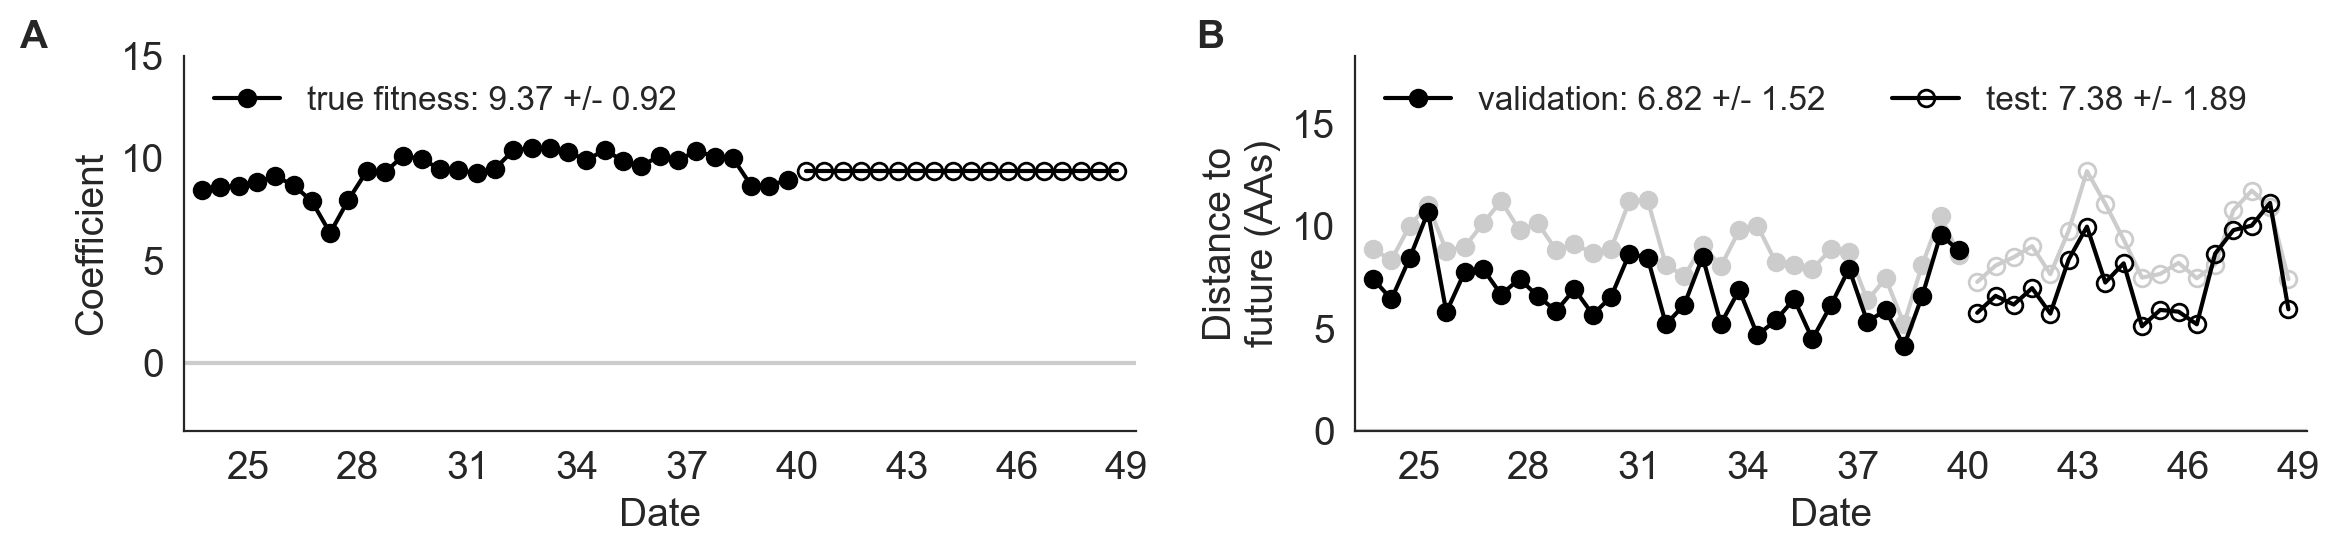

In [52]:
fig, axes, gs = plot_model_accuracy_and_coefficients_for_build(
    simulated_errors_by_time_df,
    simulated_coefficients_by_time_df,
    ["normalized_fitness"],
    rotation=0,
    years_fmt_string="%y",
    date_fmt_string="%y-%m",
    height=3,
    hspace=0.1,
    share_y=True,
    max_coefficient=15
)

plt.figtext(0.0, 0.9, "A", **panel_labels_dict)
plt.figtext(0.49, 0.9, "B", **panel_labels_dict)

plt.savefig(figure_for_simulated_model_controls)

### Model results for individual predictors and best composite

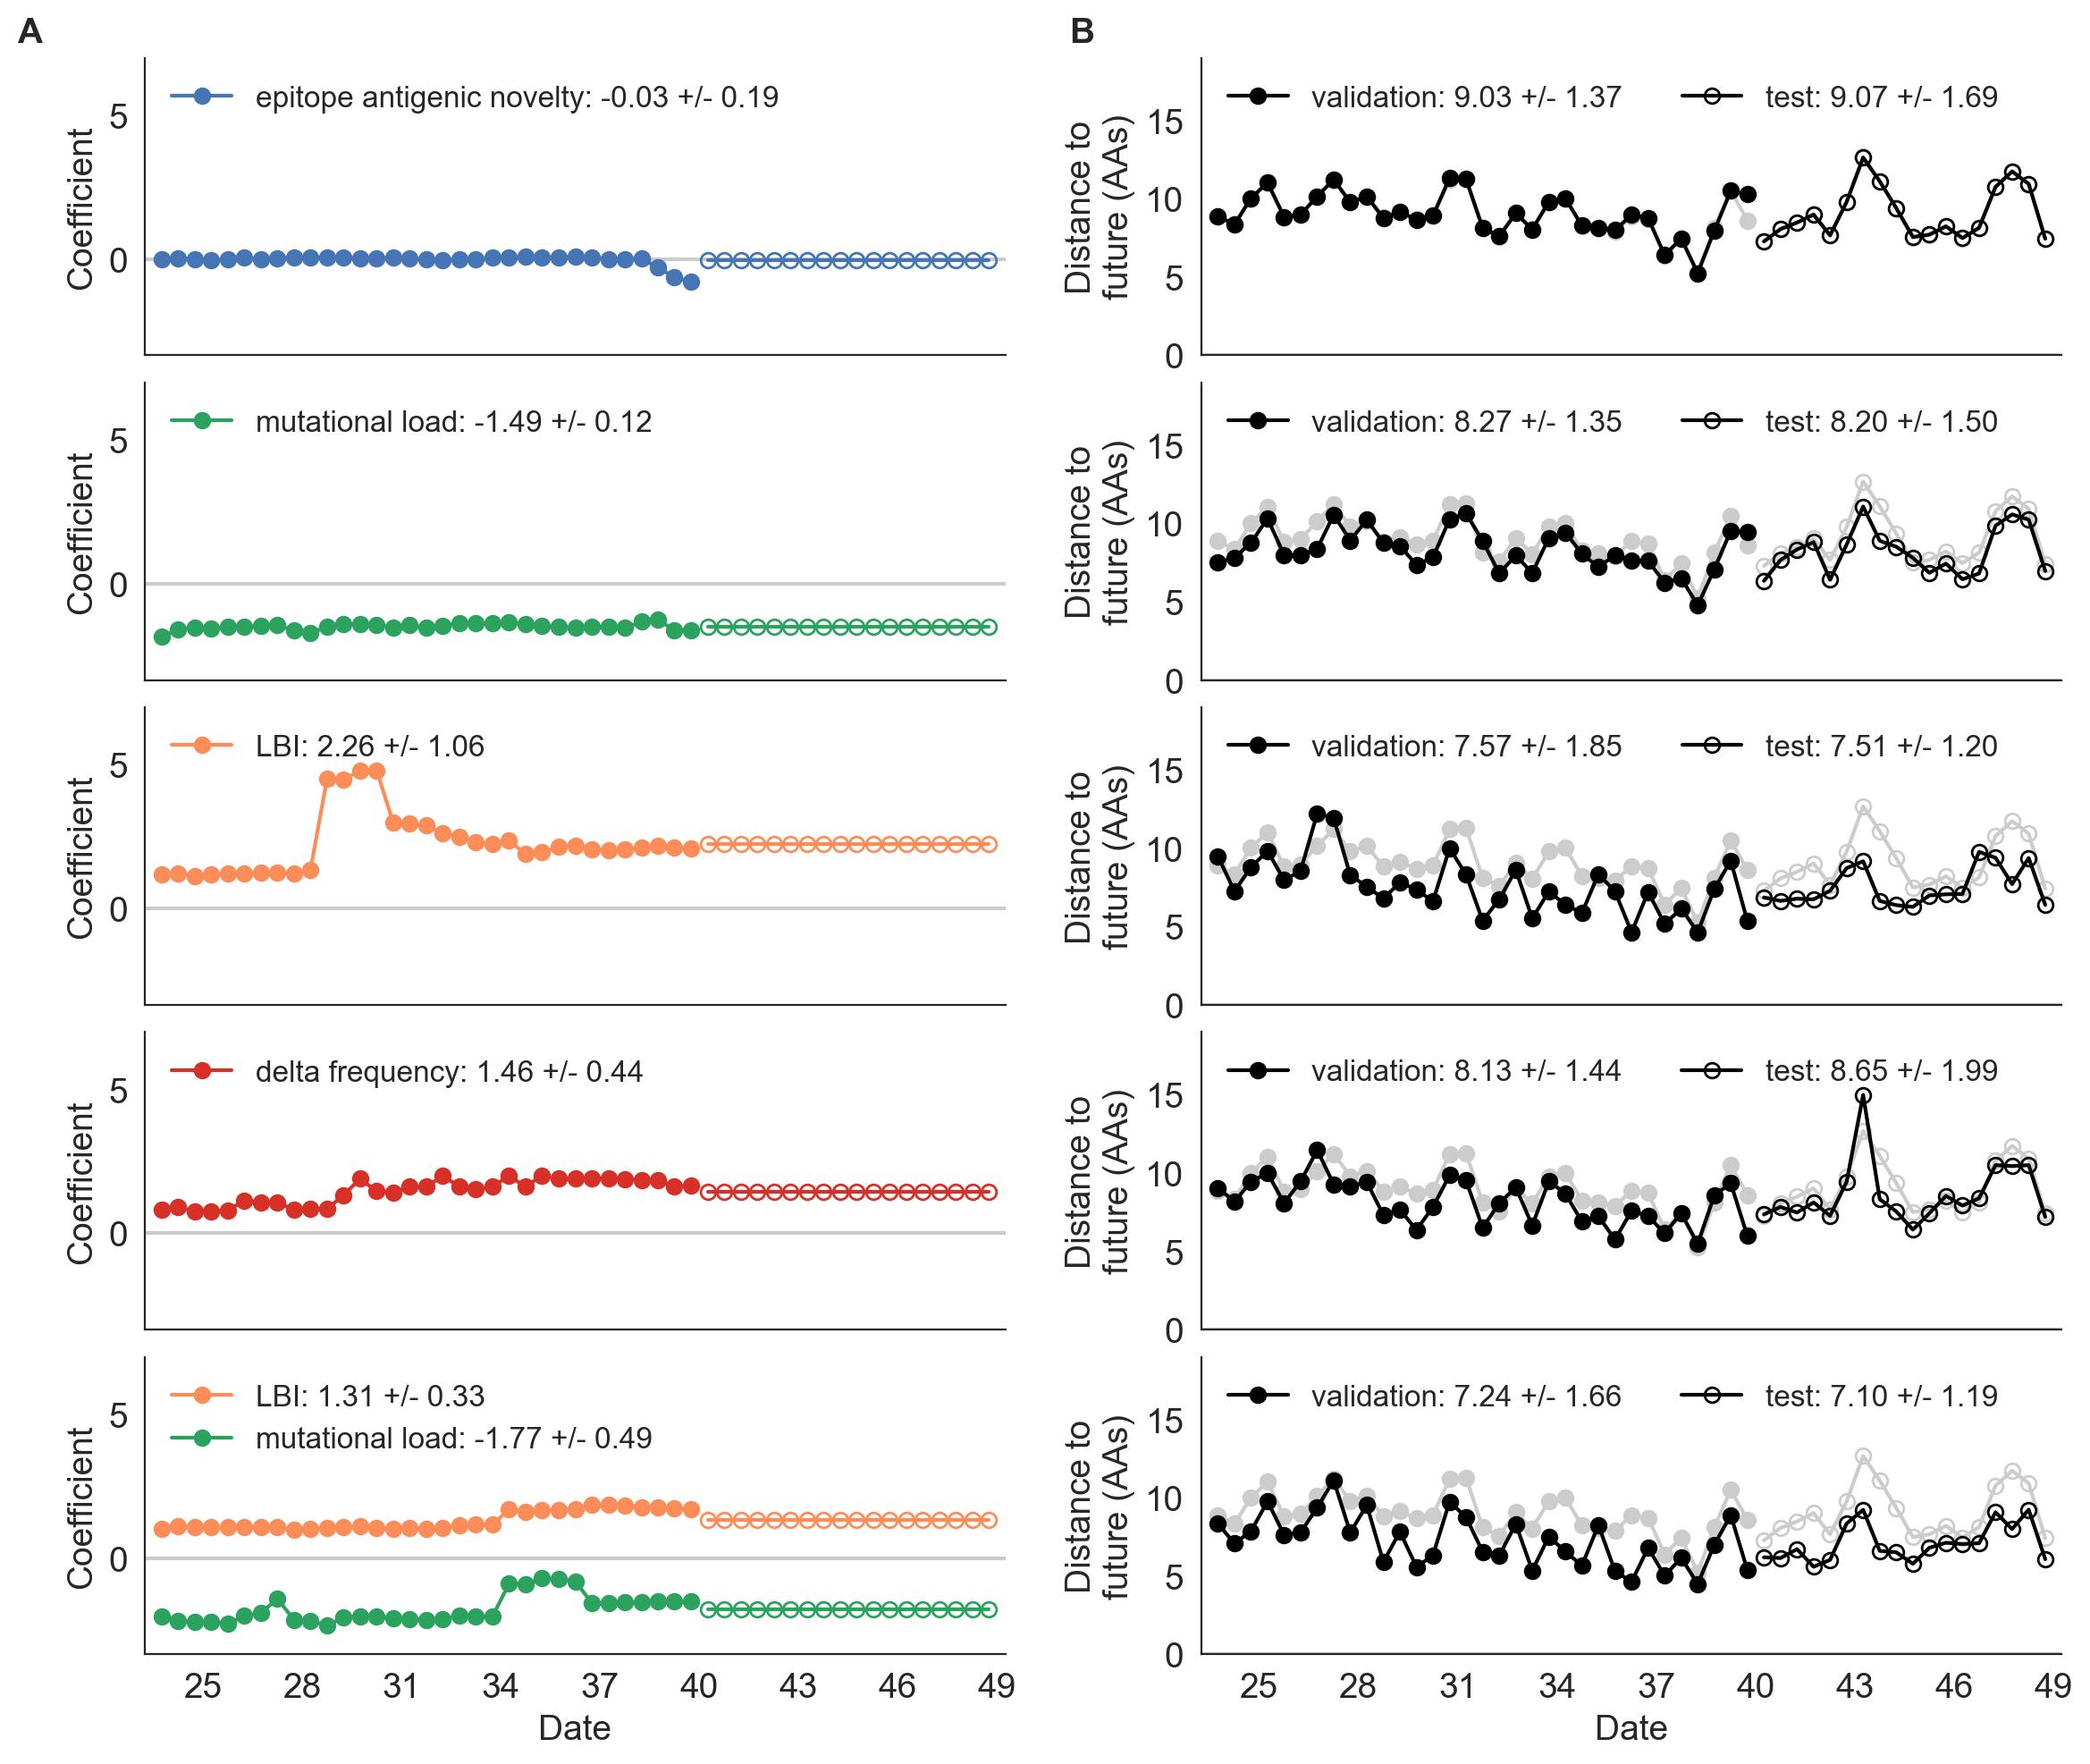

In [53]:
fig, axes, gs = plot_model_accuracy_and_coefficients_for_build(
    simulated_errors_by_time_df,
    simulated_coefficients_by_time_df,
    ["ep_x", "ne_star", "lbi", "delta_frequency", "lbi-ne_star"],
    rotation=0,
    years_fmt_string="%y",
    date_fmt_string="%y-%m",
    height=10,
    hspace=0.1,
    share_y=True,
    max_coefficient=7,
    max_normal_error=19
)

plt.figtext(0.0, 0.98, "A", **panel_labels_dict)
plt.figtext(0.49, 0.98, "B", **panel_labels_dict)

plt.savefig(figure_for_simulated_individual_models)

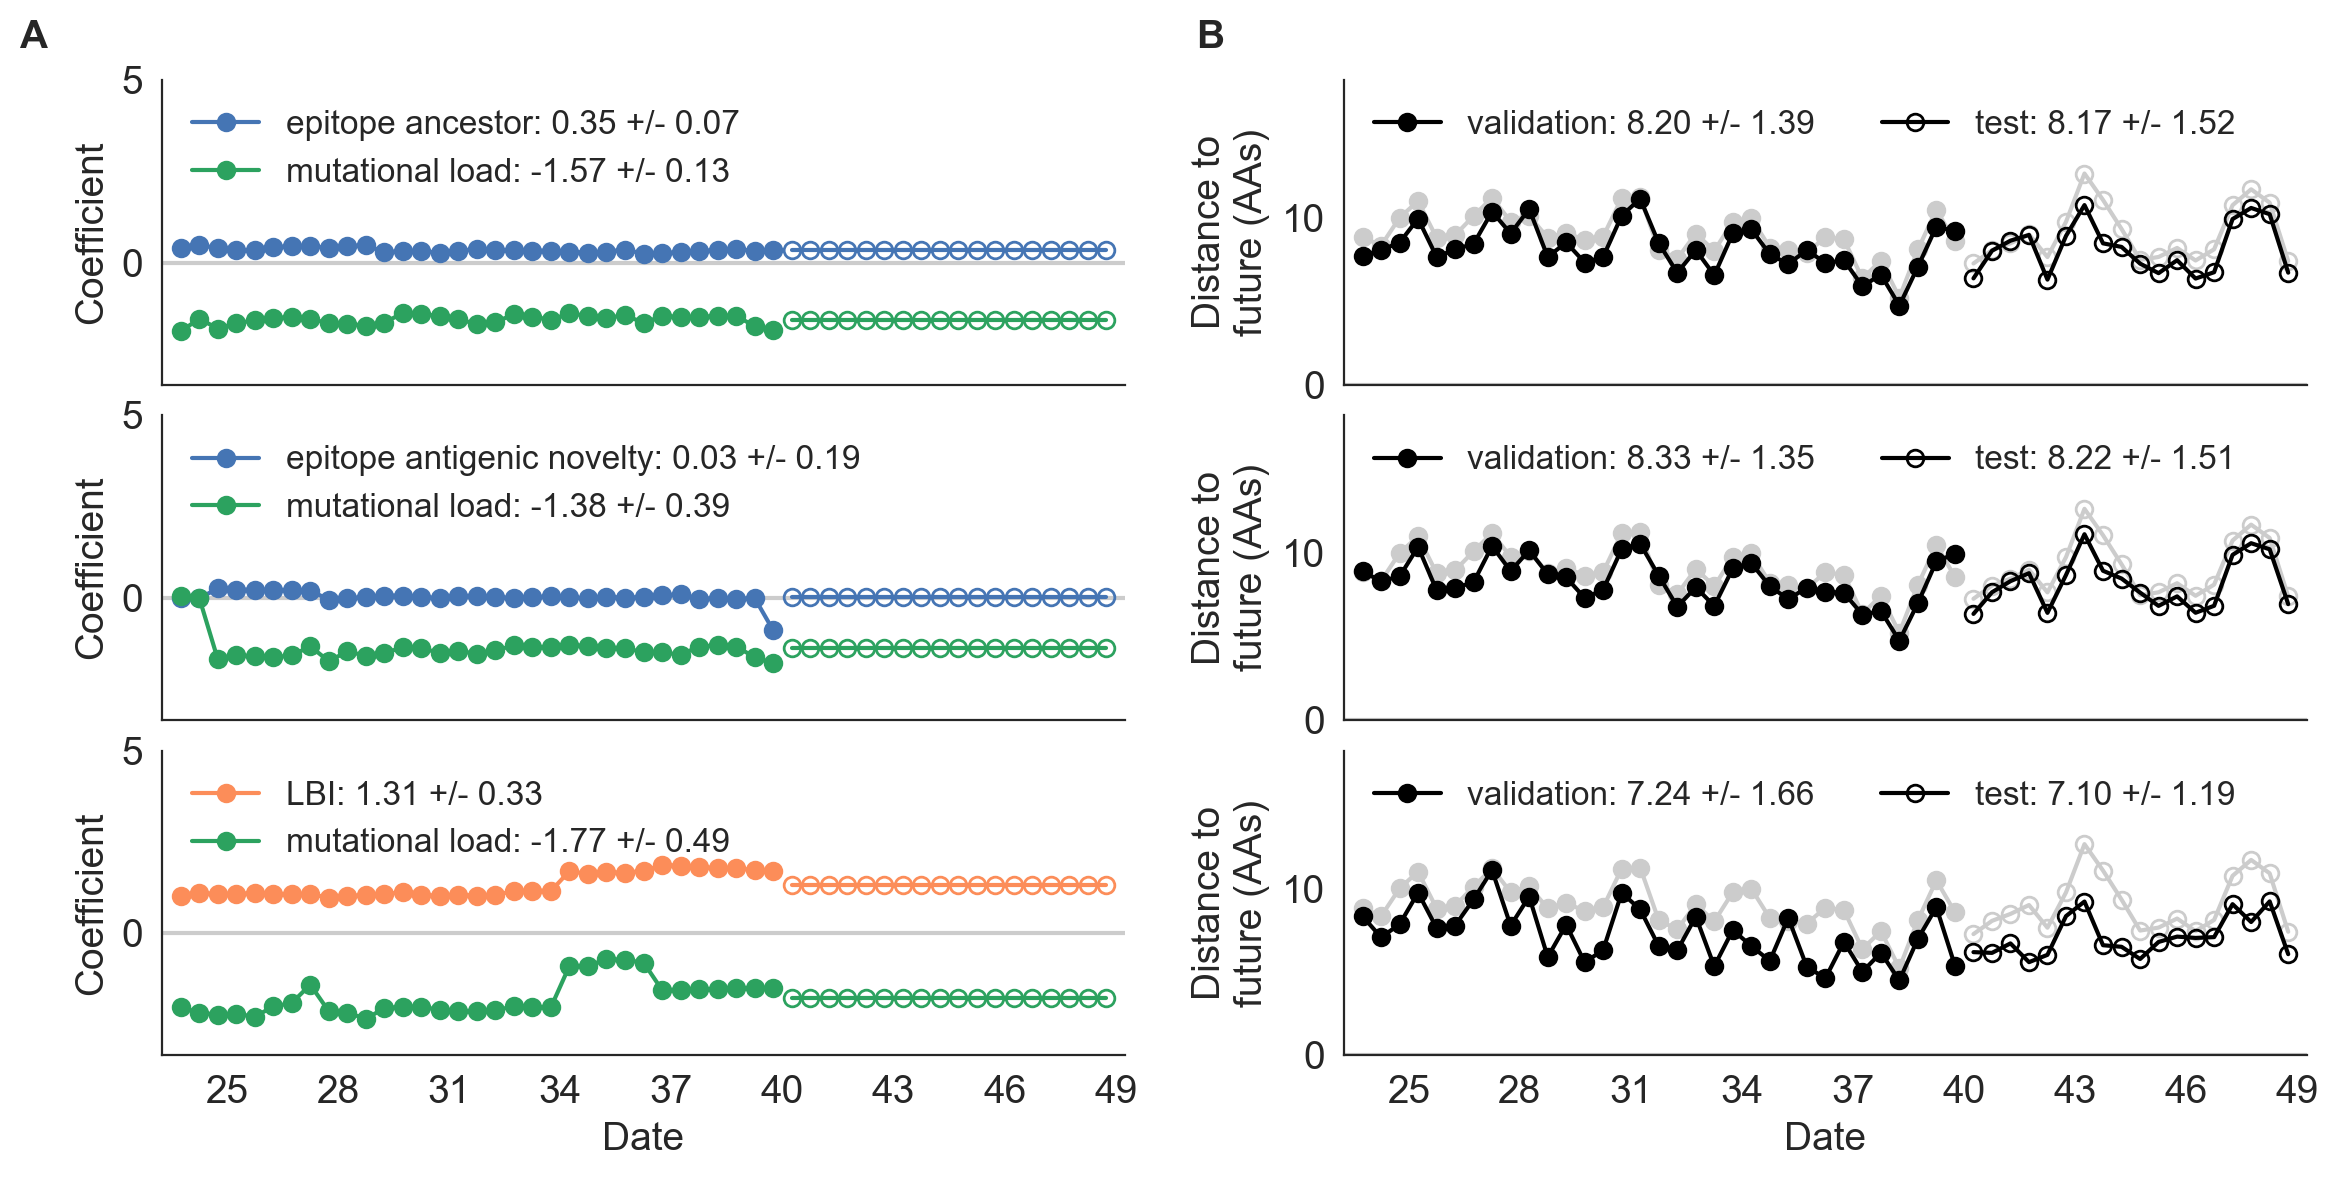

In [54]:
fig, axes, gs = plot_model_accuracy_and_coefficients_for_build(
    simulated_errors_by_time_df,
    simulated_coefficients_by_time_df,
    get_composite_predictors_for_data_frame(simulated_errors_by_time_df),
    rotation=0,
    years_fmt_string="%y",
    date_fmt_string="%y-%m",
    height=6,
    max_coefficient=5.0,
    min_normal_error=0.0
)

plt.figtext(0.0, 0.97, "A", **panel_labels_dict)
plt.figtext(0.49, 0.97, "B", **panel_labels_dict)

plt.savefig(figure_for_simulated_composite_models)

## Summary of models for natural populations

In [55]:
subset_of_individual_predictors = [
    "ep_x",
    "cTiter_x",
    "ne_star",
    "dms_star",
    "lbi",
    "delta_frequency"
]

In [56]:
composite_models = [
    "cTiter_x-ne_star",
    "ne_star-lbi",
    "cTiter_x-ne_star-lbi"
]

In [57]:
natural_errors_by_time_df["validation_timepoint"].unique().shape

(31,)

In [58]:
natural_errors_by_time_df["model"] = natural_errors_by_time_df["predictors"].apply(
    lambda predictor: " + ".join([name_by_predictor.get(predictor_name, predictor_name) for predictor_name in predictor.split("-")])
)
natural_coefficients_by_time_df["model"] = natural_coefficients_by_time_df["predictors"].apply(
    lambda predictor: " + ".join([name_by_predictor.get(predictor_name, predictor_name) for predictor_name in predictor.split("-")])
)

In [59]:
natural_errors_by_time_df["model_better_than_naive"] = (natural_errors_by_time_df["model_improvement"] > 0)
natural_errors_by_time_df["relative_improvement"] = (
    natural_errors_by_time_df["validation_error"] / natural_errors_by_time_df["null_validation_error"]
) - 1.0

In [60]:
natural_validation_errors_by_time_df = natural_errors_by_time_df.query("error_type == 'validation'").copy()
natural_validation_coefficients_by_time_df = natural_coefficients_by_time_df.query("error_type == 'validation'").copy()

natural_test_errors_by_time_df = natural_errors_by_time_df.query("error_type == 'test'").copy()
natural_test_coefficients_by_time_df = natural_coefficients_by_time_df.query("error_type == 'test'").copy()

In [61]:
subset_of_natural_validation_errors_by_time_df = natural_validation_errors_by_time_df[
    natural_validation_errors_by_time_df["predictors"].isin(["naive"] + subset_of_individual_predictors + composite_models)
].copy()

subset_of_natural_validation_coefficients_by_time_df = natural_validation_coefficients_by_time_df[
    natural_validation_coefficients_by_time_df["predictors"].isin(["naive"] + subset_of_individual_predictors + composite_models)
].copy()

subset_of_natural_test_errors_by_time_df = natural_test_errors_by_time_df[
    natural_test_errors_by_time_df["predictors"].isin(["naive"] + subset_of_individual_predictors + composite_models)
].copy()

### Model validation table

In [62]:
subset_natural_model_selection_table = prepare_complete_table(
    subset_of_natural_validation_coefficients_by_time_df,
    subset_of_natural_validation_errors_by_time_df,
    subset_of_natural_test_errors_by_time_df
)

In [63]:
print(subset_natural_model_selection_table)


\begin{tabular*}{1.05\textwidth}{lrrrrr}
\toprule
        &                 & \multicolumn{2}{c}{Distance to future (AAs)} & \multicolumn{2}{c}{Model $>$ naive} \\
  Model &    \makecell{Coefficients} & \makecell{Validation} & \makecell{Test} & \makecell{Validation} & \makecell{Test} \\
\midrule

mutational load & -0.68 +/- 0.34 & 5.44 +/- 1.80 & 7.70 +/- 3.53 & 18 (78\%) & 4 (50\%) \\
\hspace{5mm} + LBI & 1.03 +/- 0.40 & & & & \\
LBI & 1.12 +/- 0.51 & 5.68 +/- 1.91 & 8.40 +/- 3.97 & 17 (74\%) & 2 (25\%) \\
HI antigenic novelty & 0.89 +/- 0.23 & 5.82 +/- 1.50 & 5.97 +/- 1.47 & 17 (74\%) & 6 (75\%) \\
\hspace{5mm} + mutational load & -1.01 +/- 0.42 & & & & \\
HI antigenic novelty & 0.90 +/- 0.23 & 5.84 +/- 1.51 & 5.99 +/- 1.46 & 16 (70\%) & 6 (75\%) \\
\hspace{5mm} + mutational load & -1.00 +/- 0.44 & & & & \\
\hspace{5mm} + LBI & -0.04 +/- 0.09 & & & & \\
HI antigenic novelty & 0.83 +/- 0.20 & 6.01 +/- 1.50 & 6.21 +/- 1.44 & 16 (70\%) & 7 (88\%) \\
delta frequency & 0.79 +/- 0.47 & 6.

In [64]:
with open(table_for_natural_model_selection, "w") as oh:
    oh.write(subset_natural_model_selection_table)

Make a separate table with all models including those we do not discuss in the manuscript.

In [111]:
table_template_header = r"""
\begin{tabular*}{1.1\textwidth}{lrrrrr}
\toprule
        &                 & \multicolumn{2}{c}{Distance to future (AAs)} & \multicolumn{2}{c}{Model $>$ naive} \\
  Model &    \makecell{Coefficients} & \makecell{Validation} & \makecell{Test} & \makecell{Validation} & \makecell{Test} \\
\midrule
"""

complete_natural_model_selection_table = prepare_complete_table(
    natural_validation_coefficients_by_time_df,
    natural_validation_errors_by_time_df,
    natural_test_errors_by_time_df
)

with open(table_for_natural_model_complete_selection, "w") as oh:
    oh.write(complete_natural_model_selection_table)

### Inspection of epitope cross-immunity performance

Epitope cross-immunity has strong predictive support in training data, based on its consistently high coefficient prior to October 2009.

In [66]:
subset_of_natural_validation_coefficients_by_time_df.query("predictors == 'ep_x' & validation_timepoint < '2009-10-01'")["coefficient"].aggregate(["mean", "std"])

mean    1.171376
std     0.031387
Name: coefficient, dtype: float64

By the validation timepoint for October 2009, the training data for the model no longer contains more pre-2006 information than 2006 and after information. At this timepoint and after the mean coefficient drops to effectively zero.

In [67]:
subset_of_natural_validation_coefficients_by_time_df.query("predictors == 'ep_x' & validation_timepoint >= '2009-10-01'")["coefficient"].aggregate(["mean", "std"])

mean   -0.187387
std     0.338917
Name: coefficient, dtype: float64

Epitope cross-immunity does not overfit for the first few validation timepoints.

In [68]:
subset_of_natural_validation_errors_by_time_df.query("predictors == 'ep_x'").loc[
    :, ["validation_timepoint", "validation_error", "null_validation_error"]
].head()

,validation_timepoint,validation_error,null_validation_error
422,2003-10-01,7.030627,8.188325
423,2004-04-01,5.596713,6.709527
424,2004-10-01,5.182472,5.266337
425,2005-04-01,5.703338,5.477936
426,2005-10-01,7.668552,5.347614


### Individual models

In [70]:
natural_errors_by_time_df.query("predictors == 'dms_star' & model_improvement > 1")

,average_distance_to_future,average_diversity_in_future,error_type,future_timepoint,null_validation_error,predictors,sample,timepoint,type,validation_error,validation_n,validation_timepoint,model_improvement,log2_model_improvement,relative_improvement,proportion_by_model,proportion_explained,distance_from_future,model,model_better_than_naive
541,5.222529,5.172072,validation,2006-10-01,5.347614,dms_star,natural_sample_1_with_90_vpm_sliding,2006-10-01,natural,4.274793,469,2005-10-01,1.072821,0.323041,-0.200617,0.799383,0.200617,0.050457,DMS mutational effects,True
544,4.143921,4.834295,validation,2008-04-01,5.740692,dms_star,natural_sample_1_with_90_vpm_sliding,2008-04-01,natural,3.419894,431,2007-04-01,2.320798,0.747273,-0.404271,0.595729,0.404271,-0.690374,DMS mutational effects,True


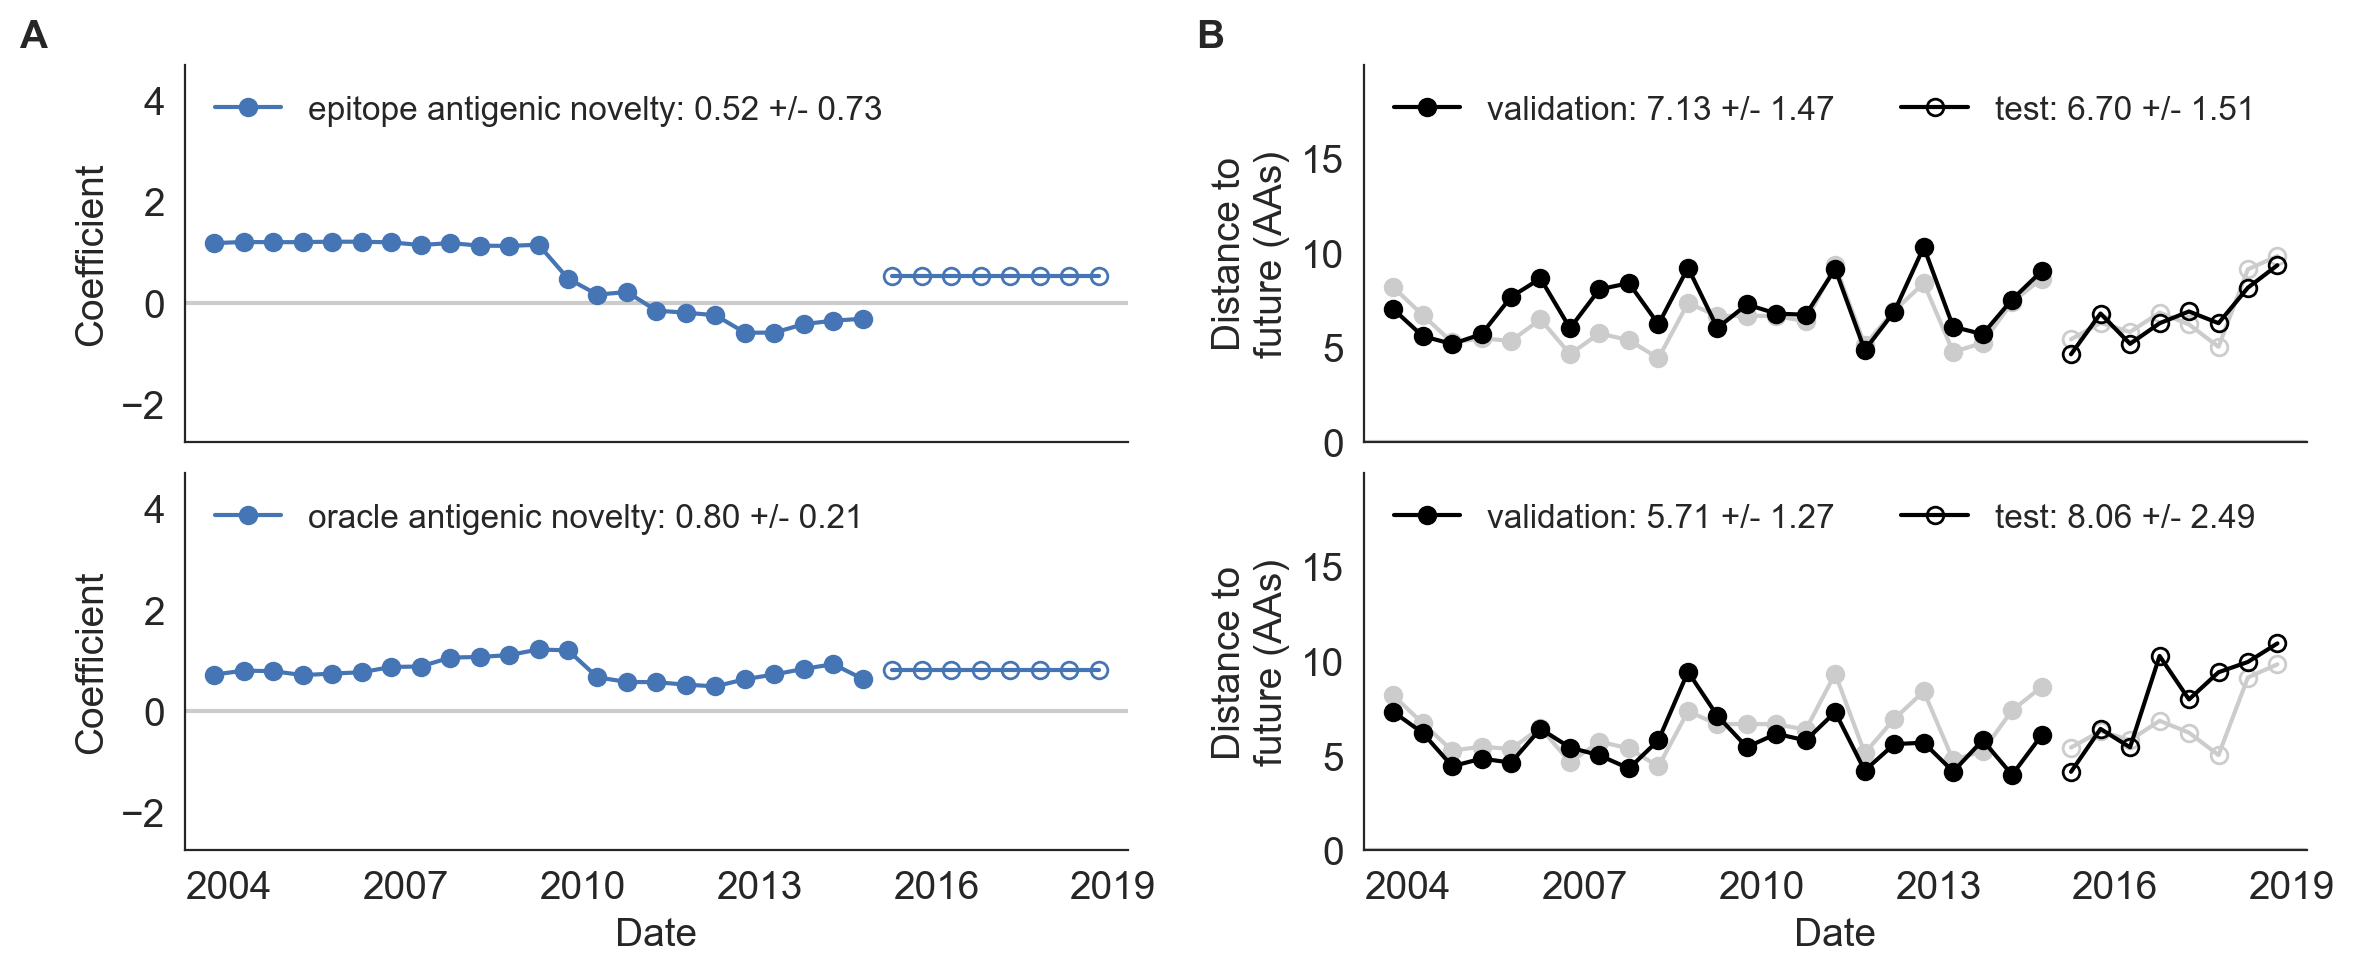

In [72]:
fig, axes, gs = plot_model_accuracy_and_coefficients_for_build(
    natural_errors_by_time_df,
    natural_coefficients_by_time_df,
    ["ep_x", "oracle_x"],
    height=5,
    rotation=0
)

plt.figtext(0.0, 0.96, "A", **panel_labels_dict)
plt.figtext(0.49, 0.96, "B", **panel_labels_dict)

plt.savefig(figure_for_natural_epitope_vs_oracle_models)

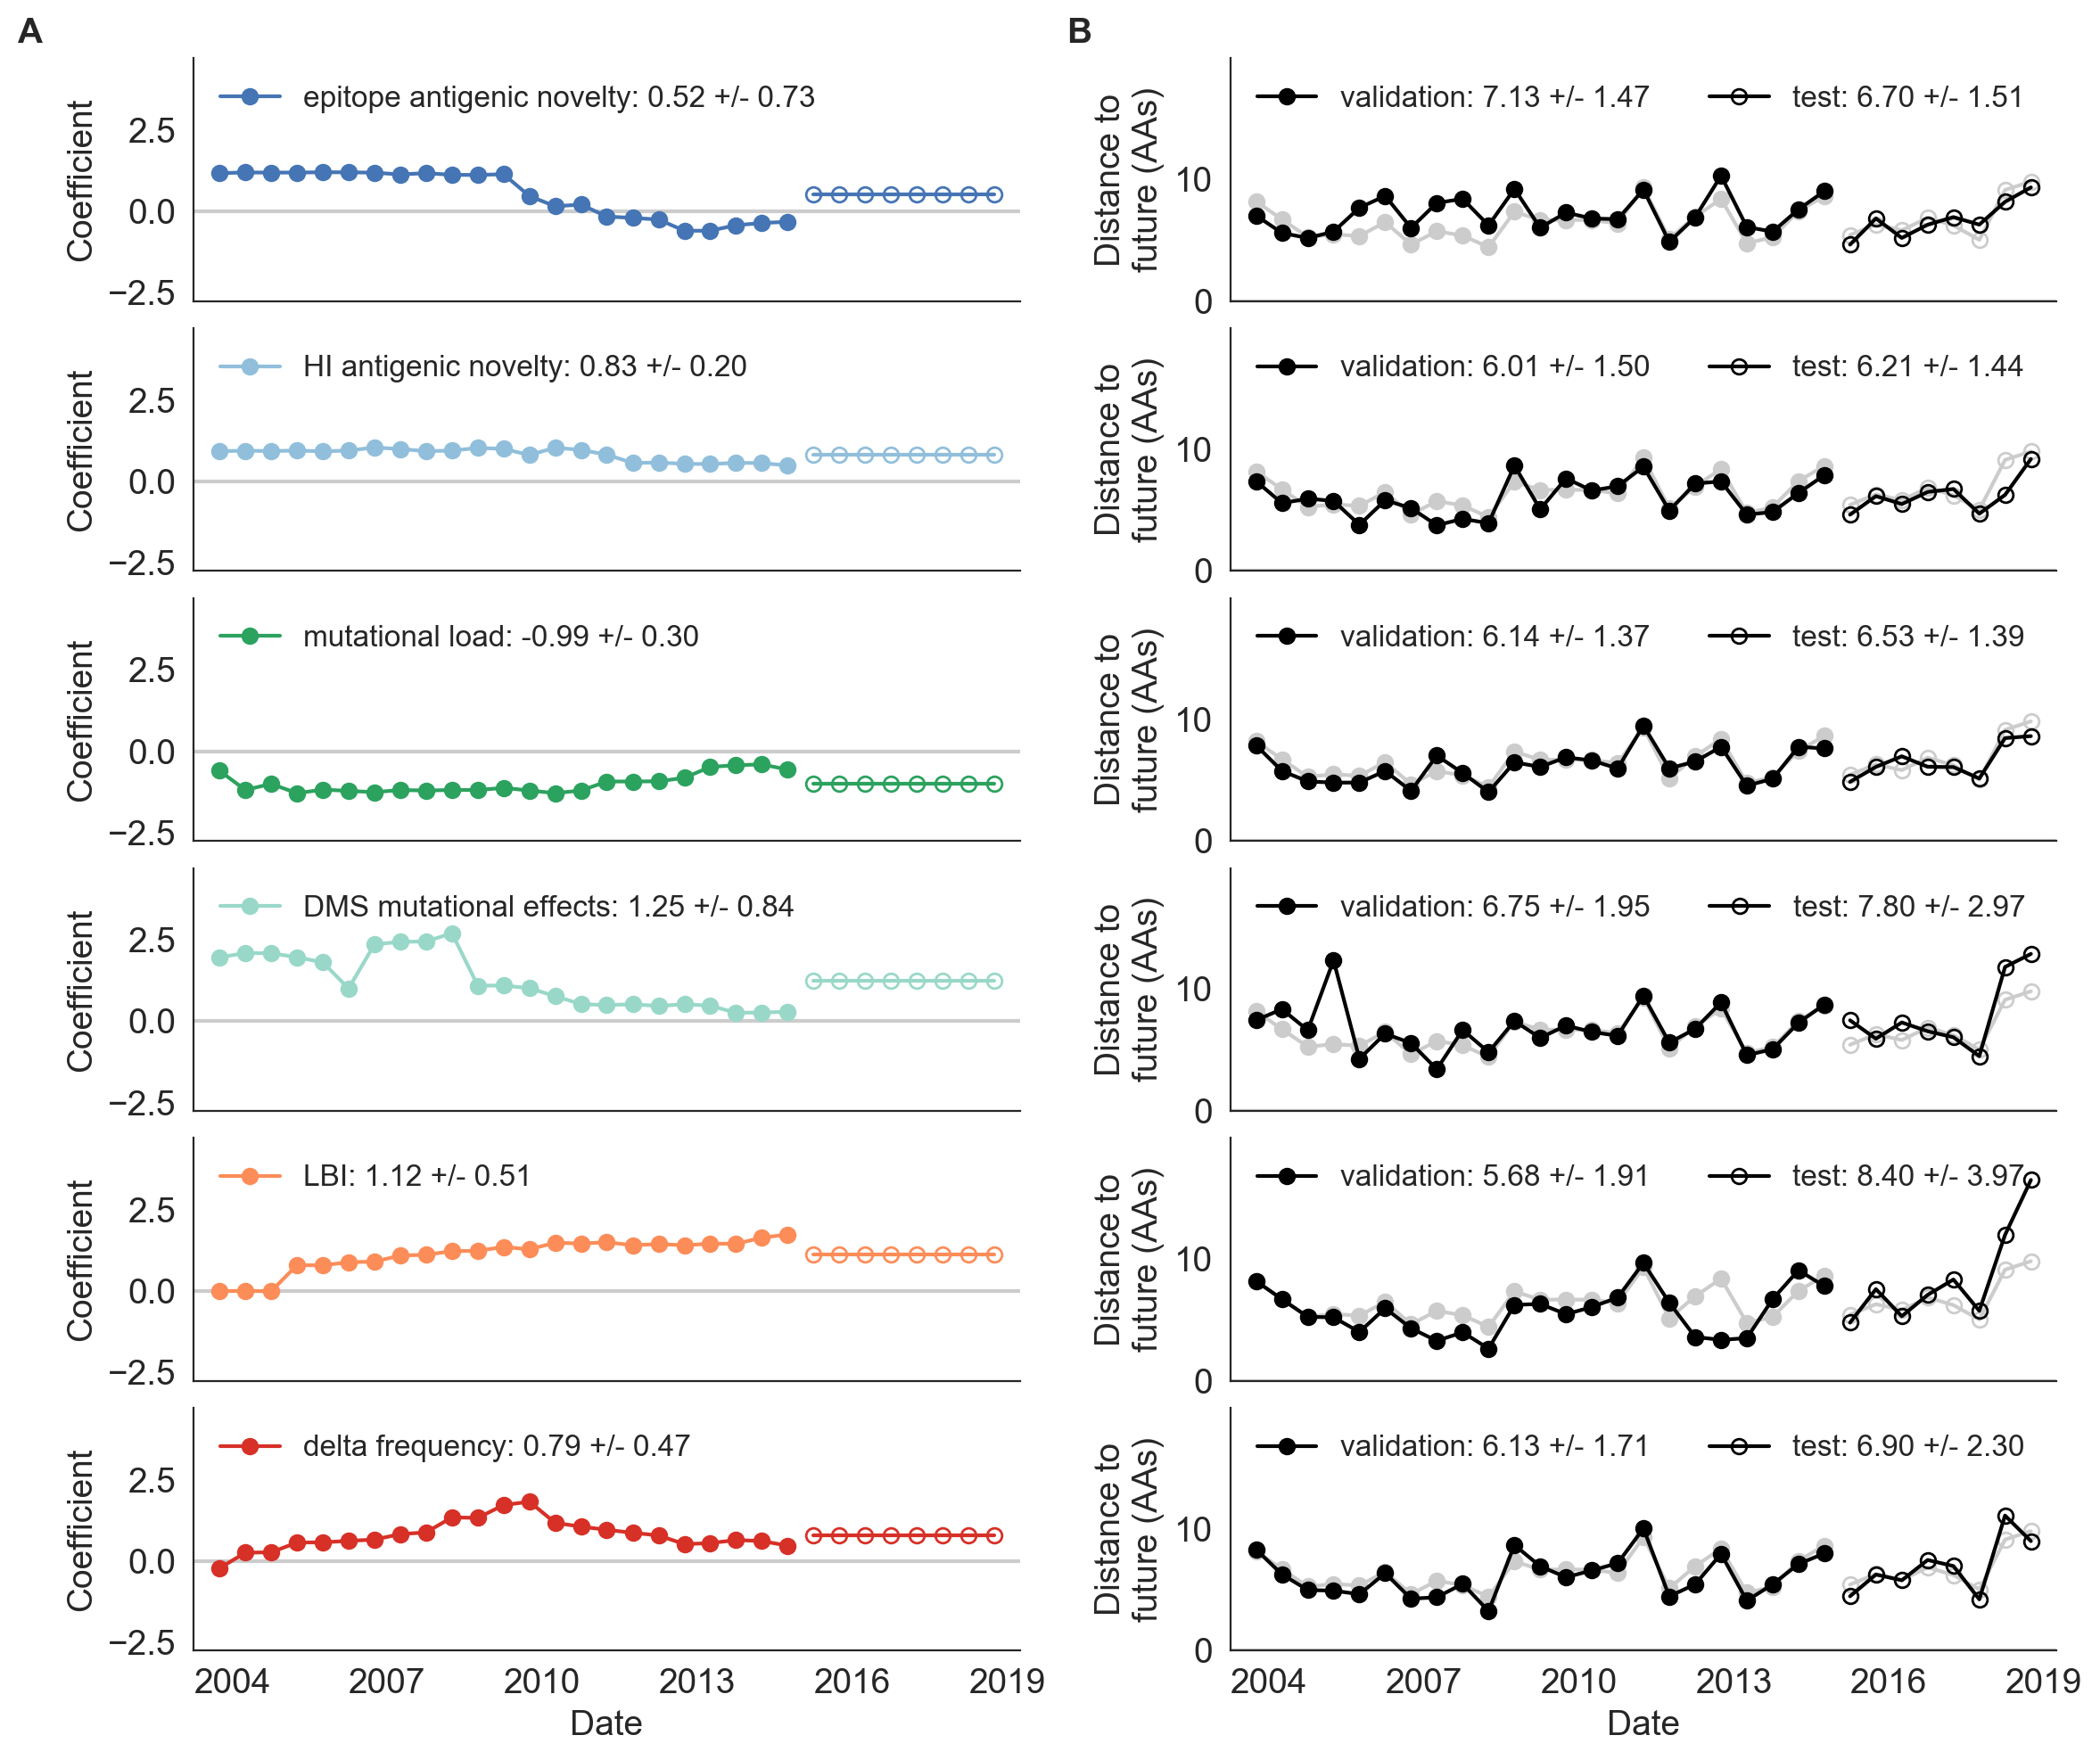

In [74]:
fig, axes, gs = plot_model_accuracy_and_coefficients_for_build(
    natural_errors_by_time_df,
    natural_coefficients_by_time_df,
    subset_of_individual_predictors,
    height=10,
    rotation=0
)

plt.figtext(0.0, 0.98, "A", **panel_labels_dict)
plt.figtext(0.49, 0.98, "B", **panel_labels_dict)

plt.savefig(figure_for_natural_individual_models)

In [75]:
natural_errors_by_time_df[
    (natural_errors_by_time_df["validation_timepoint"] == "2014-10-01") & (natural_errors_by_time_df["predictors"] == "lbi")
]

,average_distance_to_future,average_diversity_in_future,error_type,future_timepoint,null_validation_error,predictors,sample,timepoint,type,validation_error,validation_n,validation_timepoint,model_improvement,log2_model_improvement,relative_improvement,proportion_by_model,proportion_explained,distance_from_future,model,model_better_than_naive
628,8.878167,5.666102,validation,2015-10-01,8.628351,lbi,natural_sample_1_with_90_vpm_sliding,2015-10-01,natural,7.777986,750,2014-10-01,0.850366,0.149688,-0.098555,0.901445,0.098555,3.212064,LBI,True


### Composite models

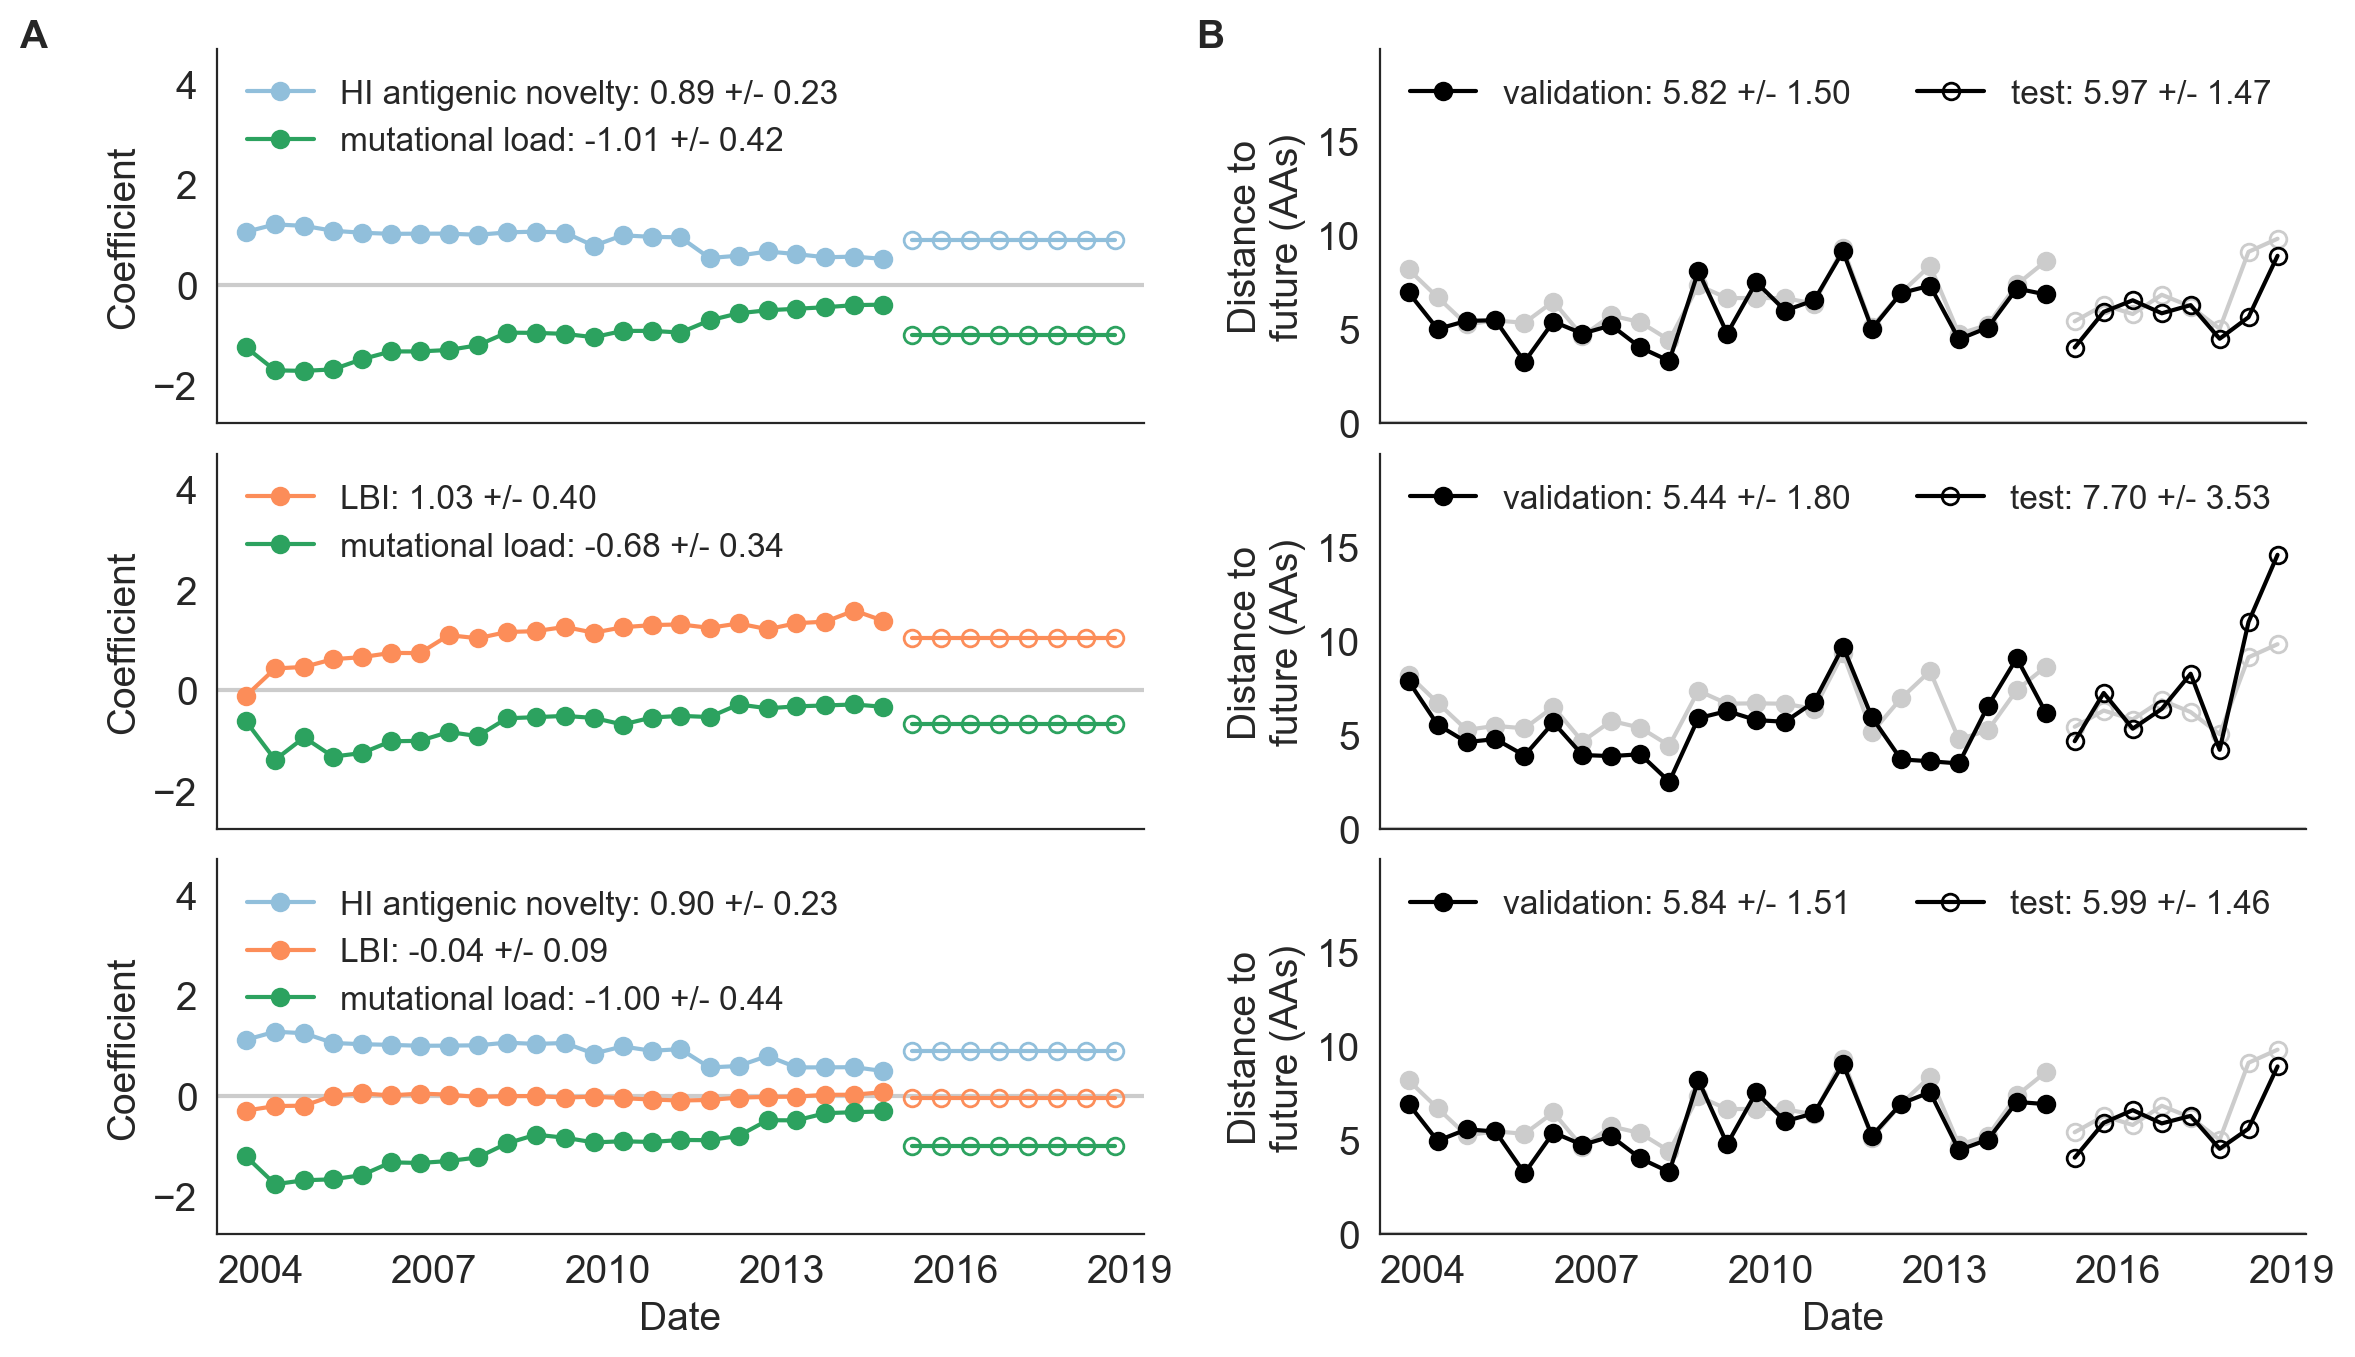

In [106]:
fig, axes, gs = plot_model_accuracy_and_coefficients_for_build(
    natural_errors_by_time_df,
    natural_coefficients_by_time_df,
    composite_models,
    height=7,
    text_vertical_padding=0.12,
#    max_coefficient=8,
    rotation=0
)

plt.figtext(0.0, 0.96, "A", **panel_labels_dict)
plt.figtext(0.49, 0.96, "B", **panel_labels_dict)

plt.savefig(figure_for_natural_composite_models)

Calculate sum of differences between the estimated distances from the naive model and each biological model. The higher sum per model, the more the biological model outperforms the naive model.

In [84]:
naive_error_df = errors_by_time_df[errors_by_time_df["predictors"] == "naive"].copy()

In [85]:
natural_errors_by_time_with_naive_df = natural_errors_by_time_df.merge(
    naive_error_df,
    on=["validation_timepoint", "validation_n", "type", "sample"],
    suffixes=["_model", "_naive"]
)

In [86]:
natural_errors_by_time_with_naive_df["model_gain"] = (
    natural_errors_by_time_with_naive_df["validation_error_naive"] - natural_errors_by_time_with_naive_df["validation_error_model"]
)

In [87]:
natural_errors_by_time_with_naive_df.head()

,average_distance_to_future_model,average_diversity_in_future_model,error_type_model,future_timepoint_model,null_validation_error_model,predictors_model,sample,timepoint_model,type,validation_error_model,...,predictors_naive,timepoint_naive,validation_error_naive,model_improvement_naive,log2_model_improvement_naive,relative_improvement_naive,proportion_by_model_naive,proportion_explained_naive,distance_from_future_naive,model_gain
0,9.062010,4.40276,validation,2004-10-01,8.188325,naive,natural_sample_1_with_90_vpm_sliding,2004-10-01,natural,8.188325,...,naive,2004-10-01,8.188325,0.0,0.0,0.0,1.0,0.0,4.65925,0.000000
1,9.060356,4.40276,validation,2004-10-01,8.188325,ep_star,natural_sample_1_with_90_vpm_sliding,2004-10-01,natural,8.186001,...,naive,2004-10-01,8.188325,0.0,0.0,0.0,1.0,0.0,4.65925,0.002324
2,8.931529,4.40276,validation,2004-10-01,8.188325,ep_x_koel,natural_sample_1_with_90_vpm_sliding,2004-10-01,natural,8.037503,...,naive,2004-10-01,8.188325,0.0,0.0,0.0,1.0,0.0,4.65925,0.150822
3,8.516570,4.40276,validation,2004-10-01,8.188325,ep_x_wolf,natural_sample_1_with_90_vpm_sliding,2004-10-01,natural,7.547457,...,naive,2004-10-01,8.188325,0.0,0.0,0.0,1.0,0.0,4.65925,0.640868
4,8.044177,4.40276,validation,2004-10-01,8.188325,ep_x,natural_sample_1_with_90_vpm_sliding,2004-10-01,natural,7.030627,...,naive,2004-10-01,8.188325,0.0,0.0,0.0,1.0,0.0,4.65925,1.157698


In [88]:
natural_errors_by_time_with_naive_df.groupby("predictors_model")["model_gain"].sum().sort_values(ascending=False)

predictors_model
cTiter_x-ne_star        20.080737
cTiter_x-ne_star-lbi    19.534341
ne_star-lbi             14.916530
cTiter_x                13.921859
ne_star                  8.351510
oracle_x                 6.023139
delta_frequency          5.624307
ep_x_koel                5.027734
lbi                      3.970287
dms_entropy              0.032941
naive                    0.000000
dms_nonepitope          -1.154492
ep_star-ne_star         -2.331760
ep_x-ne_star            -8.410751
ep_x_wolf              -11.101295
ep_star                -11.189302
dms_star               -15.834384
ep_x                   -15.870740
Name: model_gain, dtype: float64

## Cross-validation figures

In [89]:
def plot_cross_validation_times(data, ax, years_fmt_string):
    """
    """
    timepoints = data.loc[:, ["validation_timepoint", "error_type"]].drop_duplicates()
    y_positions = list(range(len(timepoints.values)))
    
    validation_timepoints = timepoints.query("error_type == 'validation'").loc[:, "validation_timepoint"].apply(
        lambda time: time.toordinal()
    ).values
    validation_y_positions = y_positions[:len(validation_timepoints)]

    test_timepoints = timepoints.query("error_type == 'test'").loc[:, "validation_timepoint"].apply(
        lambda time: time.toordinal()
    ).values
    test_y_positions = y_positions[len(validation_timepoints):]
    
    one_year = pd.DateOffset(years=1)
    training_window = pd.DateOffset(years=6)
    
    training_line_segments = [
        [((timepoint - one_year - training_window).toordinal(), y), ((timepoint - one_year).toordinal(), y)]
        for timepoint, y in zip(timepoints.query("error_type == 'validation'").loc[:, "validation_timepoint"], validation_y_positions)
    ]

    markersize = 4
    years = mdates.YearLocator(5)
    years_fmt = mdates.DateFormatter(years_fmt_string)
    months = mdates.MonthLocator()

    training_lc = LineCollection(training_line_segments, zorder=9)
    training_lc.set_color("#999999")
    training_lc.set_linewidth(1)
    training_lc.set_label("Training")
    training_artist = ax.add_collection(training_lc)

    validation_artist, = ax.plot(
        validation_timepoints,
        validation_y_positions,
        "o",
        label="Validation",
        markersize=markersize,
        color="#000000"
    )
    test_artist, = ax.plot(
        test_timepoints,
        test_y_positions,
        "o",
        label="Test",
        markersize=markersize,
        color="#000000",
        fillstyle="none"
    )

    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(years_fmt)
    ax.xaxis.set_minor_locator(months)
    ax.format_xdata = mdates.DateFormatter("%y-%m")

    ax.spines['left'].set_visible(False)
    ax.tick_params(axis='y',size=0)
    ax.set_yticklabels([])

    handles = [training_artist, validation_artist]
    labels = ["Training", "Validation"]
    
    if len(test_timepoints) > 0:
        handles.append(test_artist)
        labels.append("Test")
    
    ax.legend(
        handles,
        labels,
        frameon=False
    )
    
    ax.set_xlabel("Date")
    
    return ax

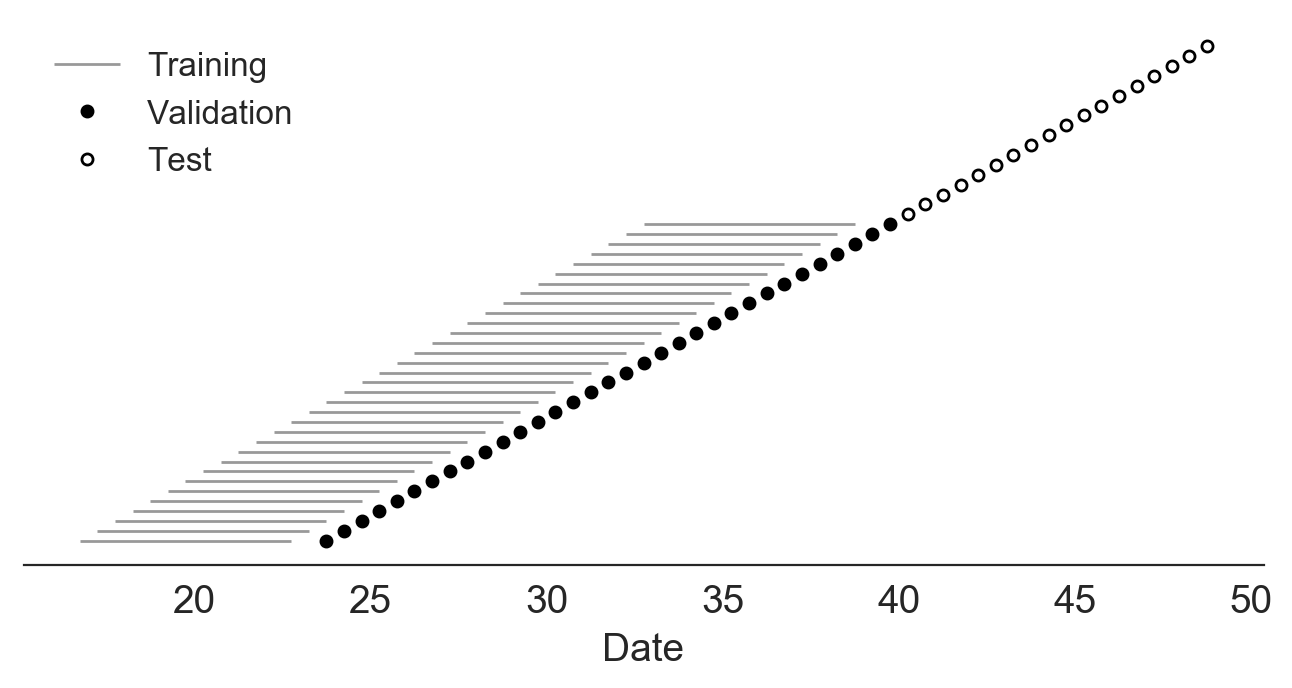

In [90]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax = plot_cross_validation_times(simulated_errors_by_time_df, ax, years_fmt_string="%y")
fig.autofmt_xdate(rotation=0, ha="center")

plt.savefig(figure_for_simulated_cross_validation)

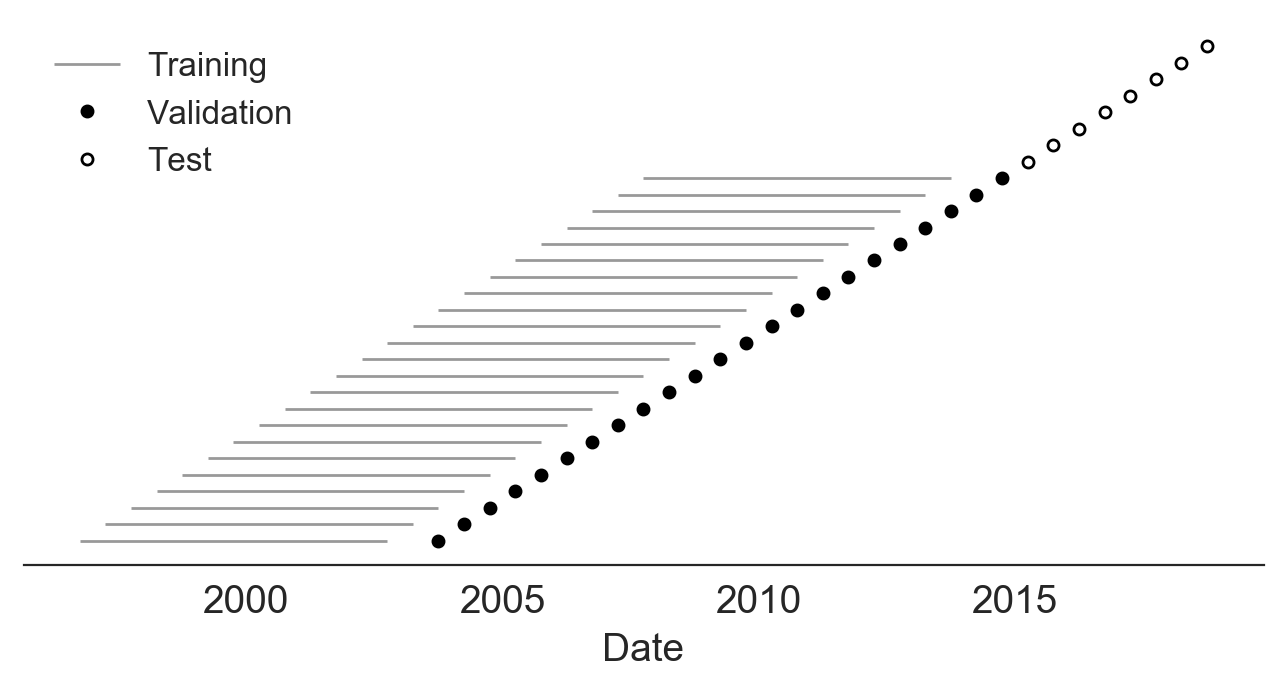

In [91]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax = plot_cross_validation_times(natural_errors_by_time_df, ax, years_fmt_string="%Y")
fig.autofmt_xdate(rotation=0, ha="center")

plt.savefig(figure_for_natural_cross_validation)

## Inspect natural model coefficients and distances in test timepoints

In [102]:
latest_natural_sample = "natural_sample_20191001"
latest_natural_errors_by_time_df = errors_by_time_df[errors_by_time_df["sample"] == latest_natural_sample].copy()
latest_natural_coefficients_by_time_df = coefficients_by_time_df[coefficients_by_time_df["sample"] == latest_natural_sample].copy()

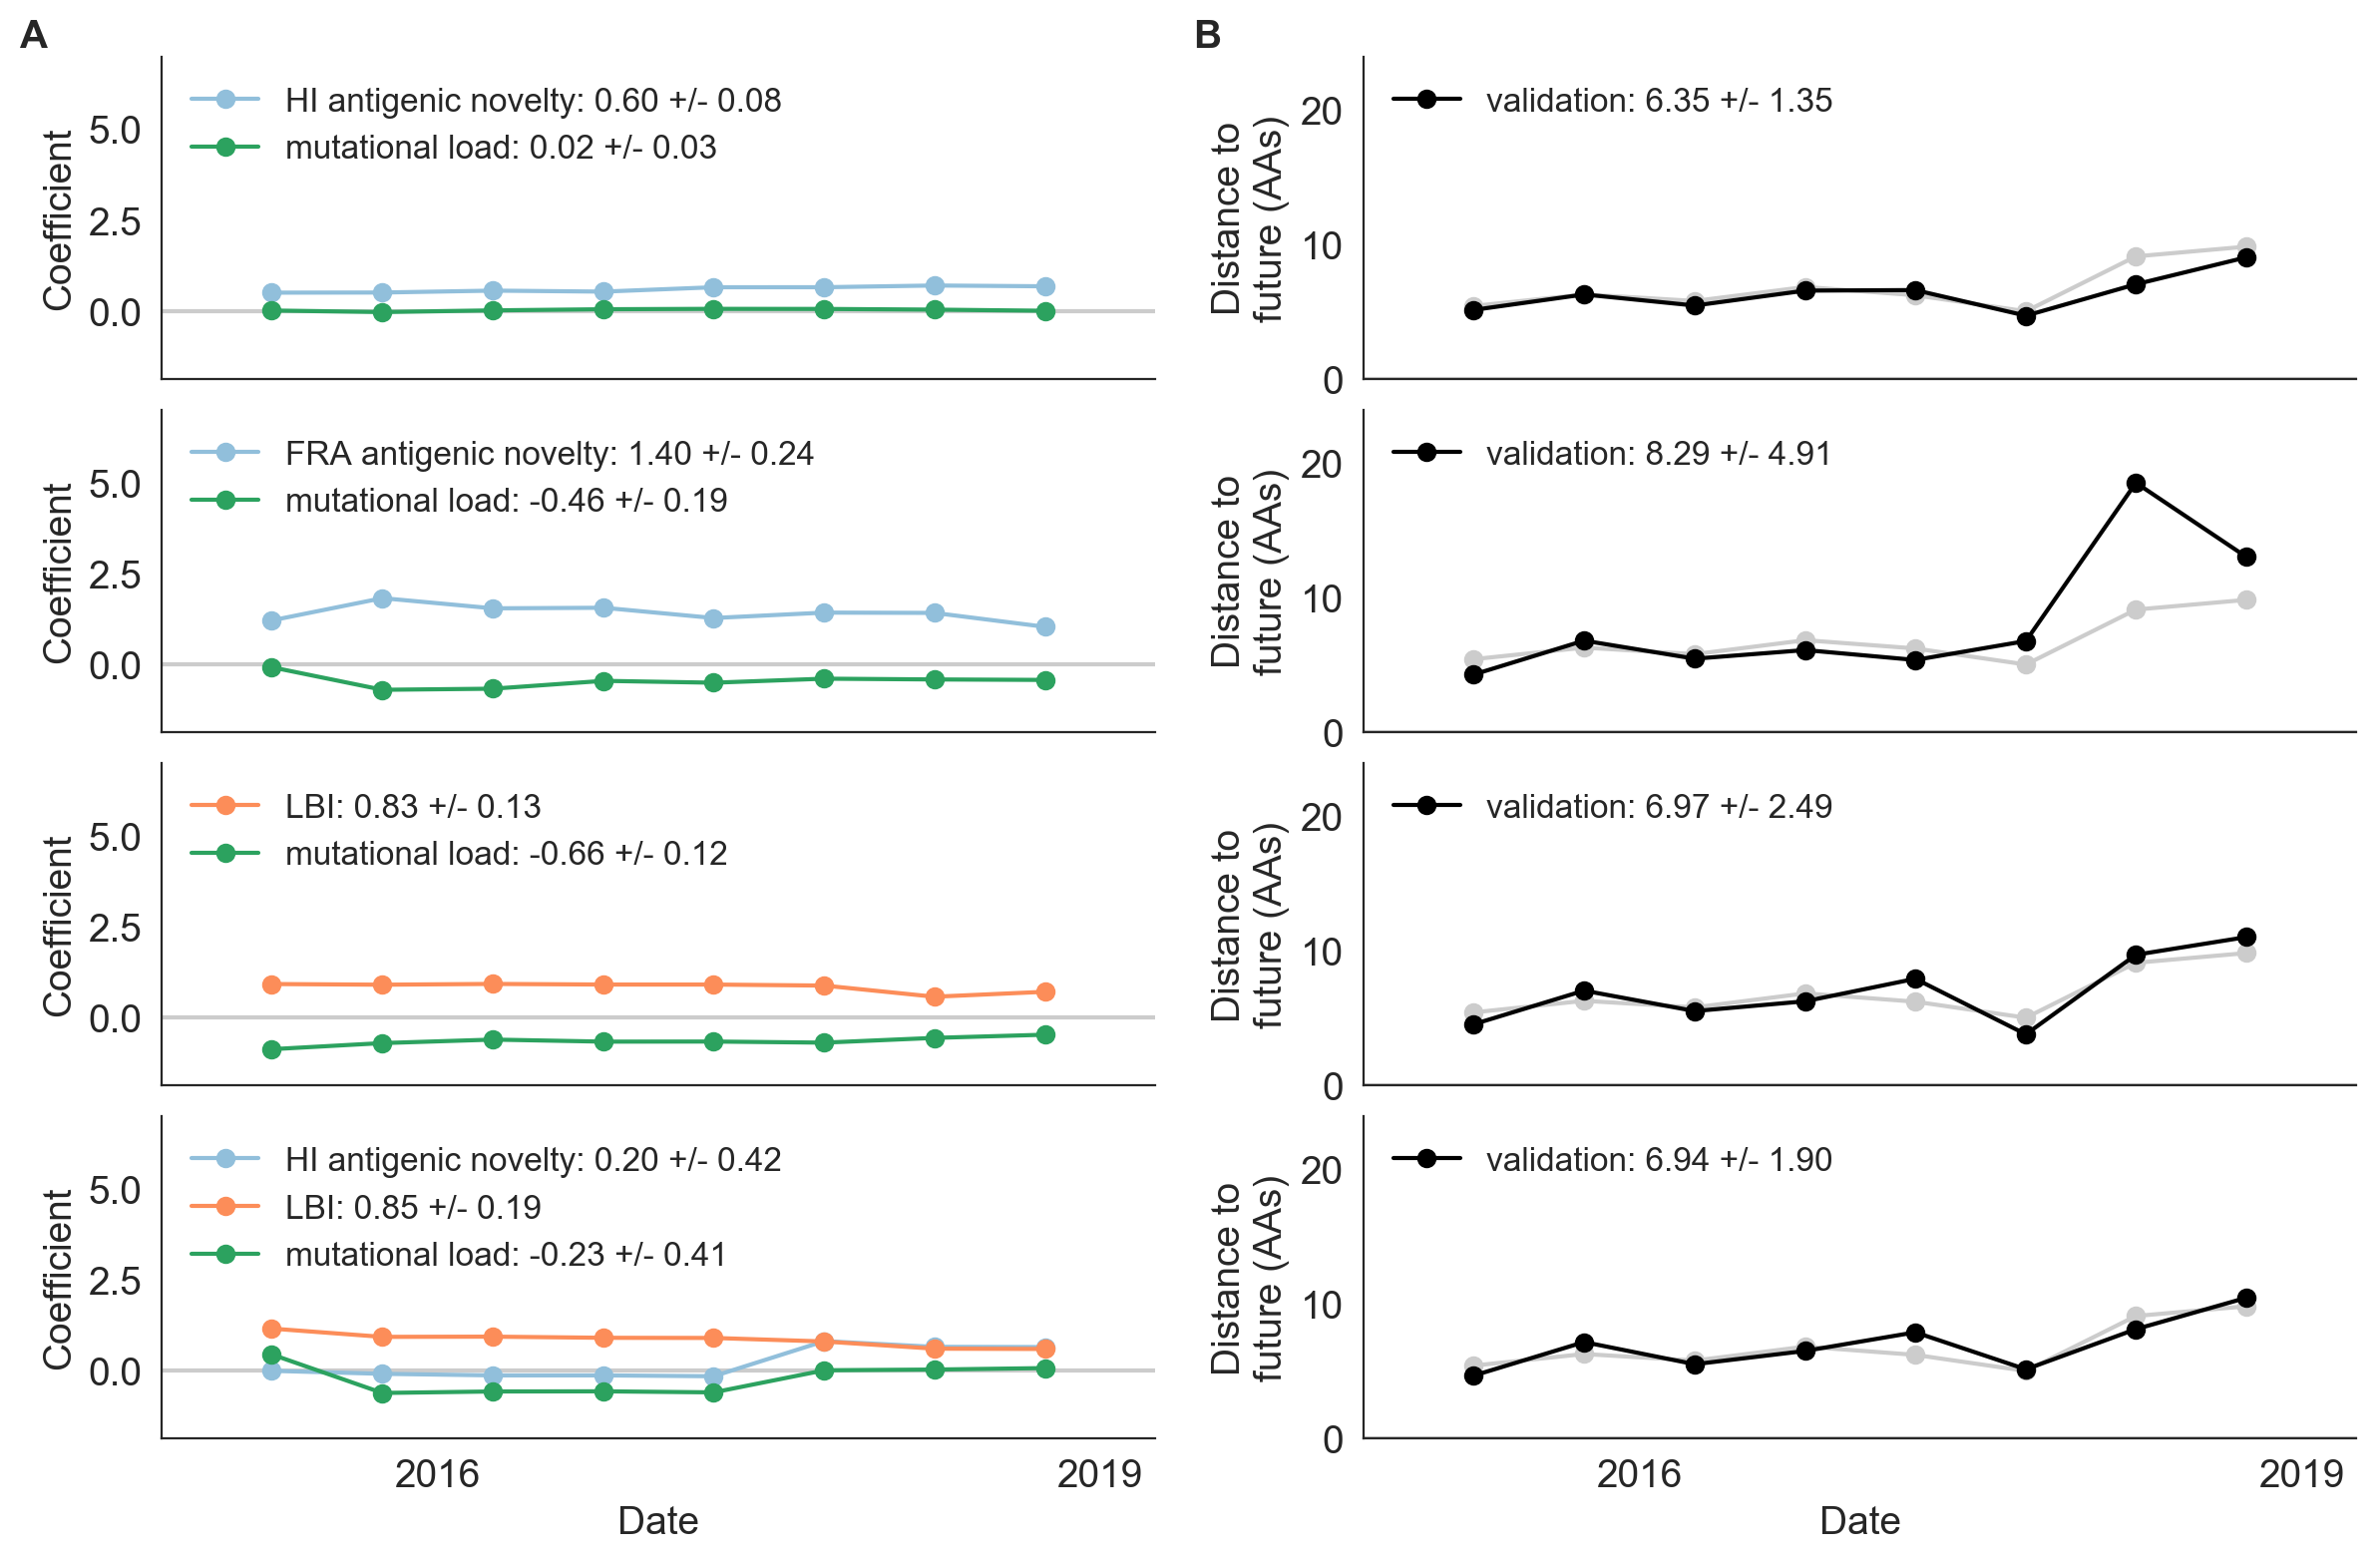

In [103]:
fig, axes, gs = plot_model_accuracy_and_coefficients_for_build(
    latest_natural_errors_by_time_df,
    latest_natural_coefficients_by_time_df,
    ["cTiter_x-ne_star", "fra_cTiter_x-ne_star", "ne_star-lbi", "cTiter_x-ne_star-lbi"],
    rotation=0,
    years_fmt_string="%Y",
    date_fmt_string="%Y-%m",
    height=8,
    hspace=0.1,
    share_y=True,
    max_coefficient=7
)

plt.figtext(0.0, 0.97, "A", **panel_labels_dict)
plt.figtext(0.49, 0.97, "B", **panel_labels_dict)

plt.savefig(figure_for_natural_updated_models)

In [104]:
latest_natural_errors_by_time_df.query("predictors == 'naive'")["validation_error"].mean()

6.816754639148712

In [105]:
latest_natural_errors_by_time_df.query("predictors == 'naive'")["validation_error"].std()

1.7368225516421656